# Assignment 'Exploring the Drivers of Modern Slavery' for the course "Business Analytics Practicum I"

Student Name:Athanasios Alexandris

Student id : p2822202

Msc : Business Analytics PT, AUEB

In this assignment we tried to estimate the prevalence of modern slavery, as well as factors that can help with this prediction, through Machine Learning techniques using the data and the methods  of the paper below:

Lavelle-Hill, R., Smith, G., Mazumder, A. et al. Machine learning methods for "wicked" problems: exploring the complex drivers of modern slavery. Humanities and Social Sciences Communications 8, 274 (2021). https://doi.org/10.1057/s41599-021-00938-z



For each question we have gathered the code of our analysis and our plots, and text for describing the steps and methods.

As first moves before we begin working on the questions we imported the libraries numpy, pandas and matplotlib, then we loaded the unimputed dataset (training) dataset which contains 70 rows and 120 columns, and we run the describe function to see the basic statistics for each column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
unimputed_data=pd.read_csv('training.csv')

In [3]:
unimputed_data.shape

(70, 120)

In [4]:
pd.options.display.max_columns = None

unimputed_data.describe()

,Data_year,KOF_Globalis,Work_rightCIRI,Trade_open,FDI,VDEM_Libdem,GDPpc_2016,Armedcon,Asia,Subsah_Africa,Americas,Europe,M_East_N_Africa,Russia_Eurasia,Pol_terror,SLAVERY,SDGI_2016,Poverty,Cereal_yield,Stunting_u5s,Undernourish,Wasting_u5s,Life_expect,Maternal_mort,Neonatal_mort,Wellbeing,Tuberculosis,Infant_mort,Infant_vaccines,Literacy_15_24yrs,Primary_school,Yrs_of_school,Lack_contraception,F_school,M_school,F_parliam,Freshwater,Sanitation,Water_acc,Co2_fuel,Electric_acc,Fuel_acc,Growth_rate,ATMs,Child_lab,Unemploy,Infrastruct,Internet_use,Broadband,Inequality,Piped_water,Treated_waste,Climate_chg_vuln,Co2_energy_pc,Ocean_biodiv,Ocean_clean,Ocean_protect,Ocean_fisheries,Fish_overexploit,Terrestrial_protect,Forest_change,Species_survival,CPI,Gov_efficien,Homicides,Prison_pop,Property_rights,Safe_night,Regist_birth,Risk_masskill_2018,Masskill_ongo,Masskill_ever,GDPpc_growth,Minority_rule,Ethnic_fract,Battle_deaths,Pol_cand_restr,Party_ban,Relig_freeMK,Polkill_apprvd,Freemv_M,Freemv_F,Free_discuss,Social_ineq,Soc_powerdist,Trade_openMK,Democ,Sexwrk_size,Sexwrk_HIV,Sexwrk_condom,Sexwrk_Syphilis,AIDS_death_2016,AIDS_death_2018,AIDS_Orph_2016,AIDS_Orph_2018,Physrights_indx_2011,Extrajud_kill_2011,Pol_impris_2011,Torture_2011,Polrights_indx_2011,Free_assem_2011,Freemv_foreign_2011,Freemv_dom_2011,Free_speech_2011,Free_polit_2011,Relig_freeCIRI_2011,Work_rightCIRI_2011,Econ_right_F_2011,Pol_right_F_2011,Indep_judic_2011,Rape_prev_2018,Rape_report_2015,Rape_enclave_2015,Rape_compl_2018,Phys_secF_2014,Phys_secF_2019,Gender_equal_2015,Hum_traff_2019
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,65.000000,69.000000,63.000000,66.000000,63.000000,70.00000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,69.000000,68.000000,70.000000,70.000000,70.000000,61.000000,70.000000,69.000000,70.000000,70.000000,65.000000,70.000000,70.000000,70.000000,69.000000,64.000000,70.000000,68.000000,70.000000,68.000000,64.000000,69.000000,70.000000,70.000000,70.000000,54.000000,54.000000,45.000000,54.000000,44.000000,70.000000,70.000000,70.000000,68.000000,68.000000,70.000000,70.000000,68.000000,70.000000,68.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,5.900000e+01,63.000000,62.000000,40.000000,58.000000,60.000000,4.800000e+01,4.800000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,65.000000,67.000000,67.000000,65.000000,67.000000,67.000000,67.000000,67.000000
mean,2017.285714,61.689857,0.614286,77.148143,4.552000,0.401143,5398.000000,0.342857,0.328571,0.228571,0.171429,0.114286,0.085714,0.071429,3.050000,0.601857,55.441143,13.550769,3.187019,24.353968,11.285303,6.585714,60.50000,170.200000,15.771429,5.081943,168.244286,34.462857,85.314286,89.369169,90.601741,12.353466,36.455283,82.728908,67.834235,19.964286,16.007252,67.722857,88.584286,1.540334,78.156153,55.111126,-1.218148,37.849146,12.698437,7.964351,3.638169,35.910429,25.289706,40.283617,69.166930,17.014442,0.115143,2.798530,82.814630,60.955185,17.068317,51.833333,27.922228,18.359690,8.625179,0.837220,37.323529,3.371176,10.301429,154.328571,3.977167,58.696377,76.592647,0.019063,0.214286,0.671429,0.028065,0.371429,0.459571,1.503694,0.885714,3.700000,3.157143,0.028571,0.842857,0.628571,0.724221,0.071429,0.614286,-2.163731,0.657143,1.191407e+05,9.096508,81.395806,4.297500,9984.482759,9218.333333,2.178583e+05,2.064167e+05,3.157143,0.785714,0.814286,0.228571,7.242857,0.885714,1.457143,1.400000,0.771429,1.100000,1.028571,0.600000,0.957143,2.071429,0.642857,1.415385,3.462687,0.925373,11.061538,3.492537,3.283582,2.462687,2.283582
std,0.965234,11.496019,0.546208,48.522488,10.682218,0.189771,7055.343047,0.478091,0.473085,0.422944


# Question 1


In the first question of the project we had to fill in the missing values of the unimputed dataset (training) using the assumptions and imputation methods taken by the researchers.

First assumption was that the data was grouped by time period 2016 and before for 2016 and post 2016 for 2018. Working on this assumption we had first to find the columns that have a year in the end of their names, that show us the year of the data. In order to find these columns we used the 're' library. 

In [5]:
import re

# define a regular expression to match column names ending with a four-digit year
pattern = re.compile('.*\d{4}$')

# find all columns that match the regular expression
year_cols = [col for col in unimputed_data.columns if pattern.match(col)]

print(year_cols)

['GDPpc_2016', 'SDGI_2016', 'Risk_masskill_2018', 'AIDS_death_2016', 'AIDS_death_2018', 'AIDS_Orph_2016', 'AIDS_Orph_2018', 'Physrights_indx_2011', 'Extrajud_kill_2011', 'Pol_impris_2011', 'Torture_2011', 'Polrights_indx_2011', 'Free_assem_2011', 'Freemv_foreign_2011', 'Freemv_dom_2011', 'Free_speech_2011', 'Free_polit_2011', 'Relig_freeCIRI_2011', 'Work_rightCIRI_2011', 'Econ_right_F_2011', 'Pol_right_F_2011', 'Indep_judic_2011', 'Rape_prev_2018', 'Rape_report_2015', 'Rape_enclave_2015', 'Rape_compl_2018', 'Phys_secF_2014', 'Phys_secF_2019', 'Gender_equal_2015', 'Hum_traff_2019']


Then we used the column names described above to a loop, that identifies all column names that they had the same base with another column (e.g AIDS_death_2016 and AIDS_death_2018). The unique base names were saved in a list named 'matching_elements', and then we create a dataframe named 'df_matching_elements' and another loop that fills the dataframe with the column names in the first column and the data year of each column in the second column.

In [6]:
matching_elements = []

# iterate over all elements in year_cols
for i in range(len(year_cols)):
    base_i = year_cols[i][:-4]  # extract the base of element i
    for j in range(i+1, len(year_cols)):
        base_j = year_cols[j][:-4]  # extract the base of element j
        if base_i == base_j:
            matching_elements.append(year_cols[i])
            matching_elements.append(year_cols[j])

df_matching_elements=pd.DataFrame(columns=['col_name', 'year'])            
for k in range(len(matching_elements)):
    df_matching_elements.loc[k,'col_name']=matching_elements[k]
    df_matching_elements.loc[k,'year']=matching_elements[k][-4:]
    
df_matching_elements['year'] = pd.to_numeric(df_matching_elements['year'])

print(df_matching_elements)

          col_name  year
0  AIDS_death_2016  2016
1  AIDS_death_2018  2018
2   AIDS_Orph_2016  2016
3   AIDS_Orph_2018  2018
4   Phys_secF_2014  2014
5   Phys_secF_2019  2019


For the situation of the duplicated base column names described above, we had to create new columns in the unimputed dataframe, and assign values depending on the value of 'data_year' column of each row. More particularly the rows of 2016 should take rows of the columns that their year is before 2016 and  the rows of 2018 should take rows of the columns that their year is post 2016. 


We created a list with the unique base names of the duplicated base column names.

In [7]:

base_cols = {}
for col in year_cols:
    base_name = re.sub('_\d{4}$', '', col)
    if base_name in base_cols:
        base_cols[base_name].append(col)
    else:
        base_cols[base_name] = [col]

# find all base columns with multiple year columns
multiyear_cols = [base_name for base_name, year_cols in base_cols.items() if len(year_cols) > 1]

print(multiyear_cols)

['AIDS_death', 'AIDS_Orph', 'Phys_secF']


For each one of them we created a new column in our dataframe with the name of the base column name

In [8]:
for col in multiyear_cols:
    unimputed_data.insert(len(unimputed_data.columns), col,'')
    


Finally we created a loop that assigns to the columns created the proper values based on the rule that we described above. The loop uses the 'df_matching_elements' dataframe that we created above in order to use it for the comparisons needed. For the rows that the column 'Data_year' has the values 2016 the loop assigns for each one of the columns discussed above (duplicated base column names) the data of the column that its year is 2016 or before. Accordingly acts for the 2018 rows assigning data of the column that its year post 2016.
We drop the duplicate base column names after the whole process.

In [9]:
for i in range (len(multiyear_cols)):
    for j in range (unimputed_data.shape[0]):
        if unimputed_data.loc[j,'Data_year']==2016:
            filtered=df_matching_elements[(df_matching_elements['col_name'].str.startswith(multiyear_cols[i])) & (df_matching_elements['year'] <= 2016)]
            column_name=filtered['col_name'].iloc[0]
            unimputed_data.loc[j,multiyear_cols[i]]=unimputed_data.loc[j,column_name]
        else:
            filtered=df_matching_elements[(df_matching_elements['col_name'].str.startswith(multiyear_cols[i])) & (df_matching_elements['year'] > 2016)]
            column_name=filtered['col_name'].iloc[0]
            unimputed_data.loc[j,multiyear_cols[i]]=unimputed_data.loc[j,column_name]
    unimputed_data[multiyear_cols[i]]=pd.to_numeric(unimputed_data[multiyear_cols[i]])
    
    
unimputed_data = unimputed_data.drop(df_matching_elements['col_name'], axis=1)           
            
    

Next assumption was the variables which had >50% of data missing to be discarded. Below we made this check and no columns that have more than 50% of null values was found.

In [10]:
null_percentages = unimputed_data.isnull().mean() * 100
null_columns = null_percentages[null_percentages > 50].index.tolist()

print("Columns with more than 50% null values:")
print(null_columns)

Columns with more than 50% null values:
[]


The next assumption was that for countries that had either 2016 or 2018 data, the data from the year where it was available was used for both years. 

For this we had just to rename the rest year columns, as their data are used for both 2016 or 2018, regardless of their data year

We made a loop that renames each column that its name follows the pattern of finishing in a 4 digit number (year), to their base names, by keeping all characters except the last 5 (e.g _2016)

In [11]:
# Define regular expression pattern
pattern = re.compile('.*_\d{4}$')

# Rename columns that match the pattern
unimputed_data = unimputed_data.rename(columns={col: col[:-5] if pattern.match(col) else col for col in unimputed_data.columns})

print(unimputed_data.columns)

Index(['Country', 'Data_year', 'Region', 'KOF_Globalis', 'Work_rightCIRI',
       'Trade_open', 'FDI', 'VDEM_Libdem', 'GDPpc', 'Armedcon',
       ...
       'Indep_judic', 'Rape_prev', 'Rape_report', 'Rape_enclave', 'Rape_compl',
       'Gender_equal', 'Hum_traff', 'AIDS_death', 'AIDS_Orph', 'Phys_secF'],
      dtype='object', length=117)


Then we run a test to see whether there are any duplicate columns after the rename process and we found that there is a column named 'Work_rightCIRI' that exists twice, as after the rename process a column named 'Work_rightCIRI_2011' was renamed to  'Work_rightCIRI' that is the name of another column that exist in our dataframe.

In [12]:
# Find the duplicate column names
duplicate_columns = unimputed_data.columns[unimputed_data.columns.duplicated()]
duplicate_columns


Index(['Work_rightCIRI'], dtype='object')

For this situation we decided to create a new column that will contain in each row the average of the other two columns, and then we dropped the other two columns.

In [13]:
# Find the duplicate column names
duplicate_columns = unimputed_data.columns[unimputed_data.columns.duplicated()]

# Create a new column with the mean of the duplicate columns
unimputed_data['Work'] = unimputed_data[duplicate_columns].mean(axis=1)

# Drop the duplicate columns
unimputed_data = unimputed_data.drop(duplicate_columns[0:], axis=1)

#Rename the column to the right name
unimputed_data = unimputed_data.rename(columns={'Work': duplicate_columns[0]})




Then as our dataset contained some columns that are practically dummy variables of the region column we decided to drop those columns.

In [14]:
unique_genders = unimputed_data['Region'].unique().tolist()
unique_genders


['ASIA',
 'AMERICAS',
 'RUSSIA AND EURASIA',
 'SUBSAHARAN AFRICA',
 'EUROPE',
 'MIDDLE EAST AND NORTH AFRICA']

In [15]:
to_be_deleted=['Asia','Subsah_Africa','Americas','Europe','M_East_N_Africa','Russia_Eurasia']

In [16]:
unimputed_data = unimputed_data.drop(to_be_deleted,axis=1)

Finally for the rest missing values we had to implement a multivariate feature imputation method with regression trees.

This method it can be applied only to numeric columns, so we isolated the numeric columns of our dataset.

In [17]:
numeric_columns = unimputed_data.select_dtypes(include=['int64', 'float64']).columns
unimputed_data_numeric = unimputed_data[numeric_columns]

We used  the IterativeImputer class from scikit-learn library. The imputer object is defined with a decision tree regressor as the estimator. The fit() method is called to fit the imputer object to the dataset, and the transform() method is called to impute the missing values in the dataset. Finally, the imputed data is returned as a pandas DataFrame with the same columns as the original dataset.

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# Define the imputer object
imputer = IterativeImputer(estimator=DecisionTreeRegressor(),
                           missing_values=np.nan, 
                           sample_posterior=False)

# Fit the imputer object to the dataset
imputer.fit(unimputed_data_numeric)

# Impute the missing values
imputed_data_numeric = imputer.transform(unimputed_data_numeric)

# Impute the missing values
imputed_data_numeric = pd.DataFrame(imputer.transform(imputed_data_numeric), columns=unimputed_data_numeric.columns)



C:\Users\mctha\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\mctha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IterativeImputer was fitted with feature names
  warnings.warn(


After this we checked that there is no column with null values in our imputed dataframe.

In [19]:
null_percentages = imputed_data_numeric.isnull().mean() * 100
null_columns = null_percentages[null_percentages > 0].index.tolist()

print("Columns with more than 0% null values:")
print(null_columns)


Columns with more than 0% null values:
[]


Finally, we inserted the two non-numeric columns in our imputed data frame.

In [20]:
##probably to be deleted
imputed_data=imputed_data_numeric
imputed_data['Country']=unimputed_data['Country']
imputed_data['Region']=unimputed_data['Region']
imputed_data.insert(0, 'Country', imputed_data.pop('Country'))
imputed_data.insert(2, 'Region', imputed_data.pop('Region'))


# Question 2

In the second question of our project we had to train three models (linear regression model, decision tree, and random forest) using the imputed data to predict slavery prevalence for both 2016 and 2018, and evaluate each model using the Out of Sample data, using the Mean Absolute Error (MAE) as the evaluation metric.

First we loadaed the out of sample dataset.

In [21]:
OOS_data=pd.read_csv('OOS_Data.csv')

Next, we compared its columns with the columns of training dataset, and we dropped the columns that are not in common in both datasets.

In [22]:
##difference in columns
diff_cols = set(imputed_data.columns) ^ set(OOS_data.columns)
diff_cols

{'Hum_traff',
 'Pop_dens',
 'Region',
 'Risk_masskill',
 'Rural_population',
 'SDGI',
 'Urban_population'}

In [23]:
##create new data frame of the all year train data and all year test data

# filter the list to keep only the columns that exist in the dataframe
cols_to_drop_in_train = [col for col in diff_cols if col in imputed_data.columns]
cols_to_drop_in_test = [col for col in diff_cols if col in OOS_data.columns]

# drop the columns from the dataframe
all_years_train_df = imputed_data.drop(columns=cols_to_drop_in_train)
all_years_test_df =OOS_data.drop(columns=cols_to_drop_in_test)

#sort_both_datasets
all_years_train_df = all_years_train_df.sort_index(axis=1)
all_years_test_df = all_years_test_df.sort_index(axis=1)

Then we split the both datasets, to two datasets each, for 2016 and 2018

In [24]:
train_2016 = all_years_train_df[all_years_train_df['Data_year'] == 2016].reset_index(drop=True)
train_2018 = all_years_train_df[all_years_train_df['Data_year'] == 2018].reset_index(drop=True)



In [25]:
test_2016 = all_years_test_df[all_years_test_df['Data_year'] == 2016].reset_index(drop=True)
test_2018 = all_years_test_df[all_years_test_df['Data_year'] == 2018].reset_index(drop=True)

After this we dropped for both datasets the columns 'Data_year' and 'Country', as they do not affect our models

In [26]:
#delete data_year and Country for train and test data
train_2016=train_2016.drop(columns='Data_year')
train_2018=train_2018.drop(columns='Data_year')
test_2016=test_2016.drop(columns='Data_year')
test_2018=test_2018.drop(columns='Data_year')

train_2016=train_2016.drop(columns='Country')
train_2018=train_2018.drop(columns='Country')
test_2016=test_2016.drop(columns='Country')
test_2018=test_2018.drop(columns='Country')

Then we create a function that normalize a data frame when it is called.

In [27]:
from sklearn import preprocessing

def Normalise(X):
    r = (0, 1)
    a = X.values
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=r)
    a = min_max_scaler.fit_transform(a)
    X = pd.DataFrame(a, columns=X.columns, index=X.index)
    return X
   


We used this function to normalise the 2016 and 2018 train and test datasets

In [28]:
train_2016 = Normalise(train_2016)
train_2018 = Normalise(train_2018)
test_2016 = Normalise(test_2016)
test_2018 = Normalise(test_2018)

Then we proceed with the creation of the linear regression model, through the LinearRegression class from scikit-learn. First we set the Xs(all features except SLAVERY) and Y (SLAVERY) for 2016 and 2018. 

In [29]:
x_2016 = train_2016.drop(columns='SLAVERY')
y_2016 = train_2016['SLAVERY']

x_2018 = train_2018.drop(columns='SLAVERY')
y_2018 = train_2018['SLAVERY']

In order to reduce the variables for the regression model we run the ridge regression and lasso for both years. To select the important variables for ridge and lasso we isolated the feature that had non zero coefficients. 
For 2016 ridge returned 102 out of 103 (all variables) and lasso returned only one, so we decided to keep the ridge variables for 2016.
For 2018 ridge returned 103 out of 103 (all variables) and lasso returned 12, so we decided to keep the lasso variables for 2018.


In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge


# Create a RidgeCV object
ridge_cv_2016 = RidgeCV(cv=5)
ridge_cv_2018 = RidgeCV(cv=5)

# Fit the RidgeCV object to the training data
ridge_cv_2016.fit(x_2016, y_2016)
ridge_cv_2018.fit(x_2018, y_2018)

# Get the optimal value of alpha
alpha_2016 = ridge_cv_2016.alpha_
alpha_2018 = ridge_cv_2018.alpha_

# Create a Ridge object with the optimal alpha value
ridge_2016 = Ridge(alpha=alpha_2016)
ridge_2018 = Ridge(alpha=alpha_2018)

# Fit the Ridge object to the training data
ridge_2016.fit(x_2016, y_2016)
ridge_2018.fit(x_2018, y_2018)


# Get the coefficients of the Ridge model
coef_2016 = ridge_2016.coef_
coef_2018 = ridge_2018.coef_

# Create a boolean mask for the coefficients that are not zero
non_zero_coef_mask_2016 = (coef_2016 != 0)
non_zero_coef_mask_2018 = (coef_2018 != 0)

# Get the names of the features with non-zero coefficients
ridge_important_features_2016 = x_2016.columns[non_zero_coef_mask_2016]
ridge_important_features_2018 = x_2018.columns[non_zero_coef_mask_2018]

print('2016')
print(ridge_important_features_2016)
print('2018')
print(ridge_important_features_2018)


2016
Index(['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab', 'Climate_chg_vuln',
       ...
       'Treated_waste', 'Tuberculosis', 'Undernourish', 'Unemploy',
       'VDEM_Libdem', 'Wasting_u5s', 'Water_acc', 'Wellbeing',
       'Work_rightCIRI', 'Yrs_of_school'],
      dtype='object', length=102)
2018
Index(['AIDS_Orph', 'AIDS_death', 'ATMs', 'Armedcon', 'Battle_deaths',
       'Broadband', 'CPI', 'Cereal_yield', 'Child_lab', 'Climate_chg_vuln',
       ...
       'Treated_waste', 'Tuberculosis', 'Undernourish', 'Unemploy',
       'VDEM_Libdem', 'Wasting_u5s', 'Water_acc', 'Wellbeing',
       'Work_rightCIRI', 'Yrs_of_school'],
      dtype='object', length=103)


In [31]:
from sklearn.linear_model import LassoCV, Lasso

# Create a LassoCV object
lasso_cv_2016 = LassoCV(cv=5, random_state=42)
lasso_cv_2018 = LassoCV(cv=5, random_state=43)

# Fit the LassoCV object to the training data
lasso_cv_2016.fit(x_2016, y_2016)
lasso_cv_2018.fit(x_2018, y_2018)

# Get the optimal value of alpha
alpha_2016 = lasso_cv_2016.alpha_
alpha_2018 = lasso_cv_2018.alpha_

# Create a Lasso object with the optimal alpha value
lasso_2016 = Lasso(alpha=alpha_2016)
lasso_2018 = Lasso(alpha=alpha_2018)

# Fit the Lasso object to the training data
lasso_2016.fit(x_2016, y_2016)
lasso_2018.fit(x_2018, y_2018)

# Get the coefficients of the Lasso model
coef_2016 = lasso_2016.coef_
coef_2018 = lasso_2018.coef_

# Create a boolean mask for the coefficients that are not zero
non_zero_coef_mask_2016 = (coef_2016 != 0)
non_zero_coef_mask_2018 = (coef_2018 != 0)

# Get the names of the features with non-zero coefficients
lasso_important_features_2016 = x_2016.columns[non_zero_coef_mask_2016]
lasso_important_features_2018 = x_2018.columns[non_zero_coef_mask_2018]

print('2016')
print(lasso_important_features_2016)
print('2018')
print(lasso_important_features_2018)


2016
Index(['Indep_judic'], dtype='object')
2018
Index(['Battle_deaths', 'Climate_chg_vuln', 'Free_discuss', 'Freemv_foreign',
       'Fuel_acc', 'Internet_use', 'Literacy_15_24yrs', 'Masskill_ongo',
       'Minority_rule', 'Neonatal_mort', 'Relig_freeMK', 'Water_acc'],
      dtype='object')


Then we created two instances  of the LinearRegression class, one for each year. Then the fit() method was called on the model object with the training features and target variable as arguments for 2016 and 2018. After the model is fit to the training data for both years, the predict() method is used to make predictions on the testing data for both years. Finally we used the mean_absolute_error() function from scikit-learn  to calculate the mean absolute error between the actual and predicted values for both years. MAE are  0.37 and 0.192 for 2016 and 2018 respectively.

In [32]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# create a linear regression model
model_LR_2016 = LinearRegression()
model_LR_2018 = LinearRegression()

# fit the model to the training data
model_LR_2016.fit(x_2016[ridge_important_features_2016], y_2016)

model_LR_2018.fit(x_2018[lasso_important_features_2018], y_2018)


# make predictions on the testing data
y_pred_2016 = model_LR_2016.predict(test_2016[ridge_important_features_2016])
y_pred_2018 = model_LR_2018.predict(test_2018[lasso_important_features_2018])

# calculate mean absolute error
mae_2016_lr = mean_absolute_error(test_2016['SLAVERY'], y_pred_2016)
mae_2018_lr = mean_absolute_error(test_2018['SLAVERY'], y_pred_2018)


print("MAE 2016: ", mae_2016_lr)
print("MAE 2018: ", mae_2018_lr)



MAE 2016:  0.35495203986450485
MAE 2018:  0.19225167412099775


Then we used the coefficients of our models, to identify the most important features. We also make bar charts that indicate all features for each model their importance score.

For 2016 the top five features were the following in descending order on their importance score:

1.Free_polit (Electoral Self-Determination), 2.Phys_secF (The physical security of women), 3.F_school (Expected years of schooling), 4.Climate_chg_vuln (Climate change vulnerability), 5.Social_ineq (Inequality in civil liberties by social group)

For 2018 the top five features were the following in descending order on their importance score:

1.Co2_fuel (CO2 from fuels & electricity), 2.AIDS_death (Number of AIDS-related deaths), 3.Climate_chg_vuln (Climate change vulnerability), 4.AIDS_Orph (AIDS orphans), 5.Co2_energy_pc (CO2 emissions from energy).

In [33]:
# Get the feature coefficients
coefficients = abs(model_LR_2016.coef_)

# Sort the features by coefficient magnitude
sorted_features = x_2016.columns[np.argsort(coefficients)[::-1]]

# Create a dataframe to display the feature coefficients
df_features_lr_2016 = pd.DataFrame({'Features': sorted_features, 'Importance': coefficients[np.argsort(abs(coefficients))[::-1]]})

# Print the dataframe
print(df_features_lr_2016.head(5))


       Features  Importance
0    Free_polit    0.184058
1   Ocean_clean    0.152694
2   Social_ineq    0.149243
3  Internet_use    0.140100
4  Electric_acc    0.119383


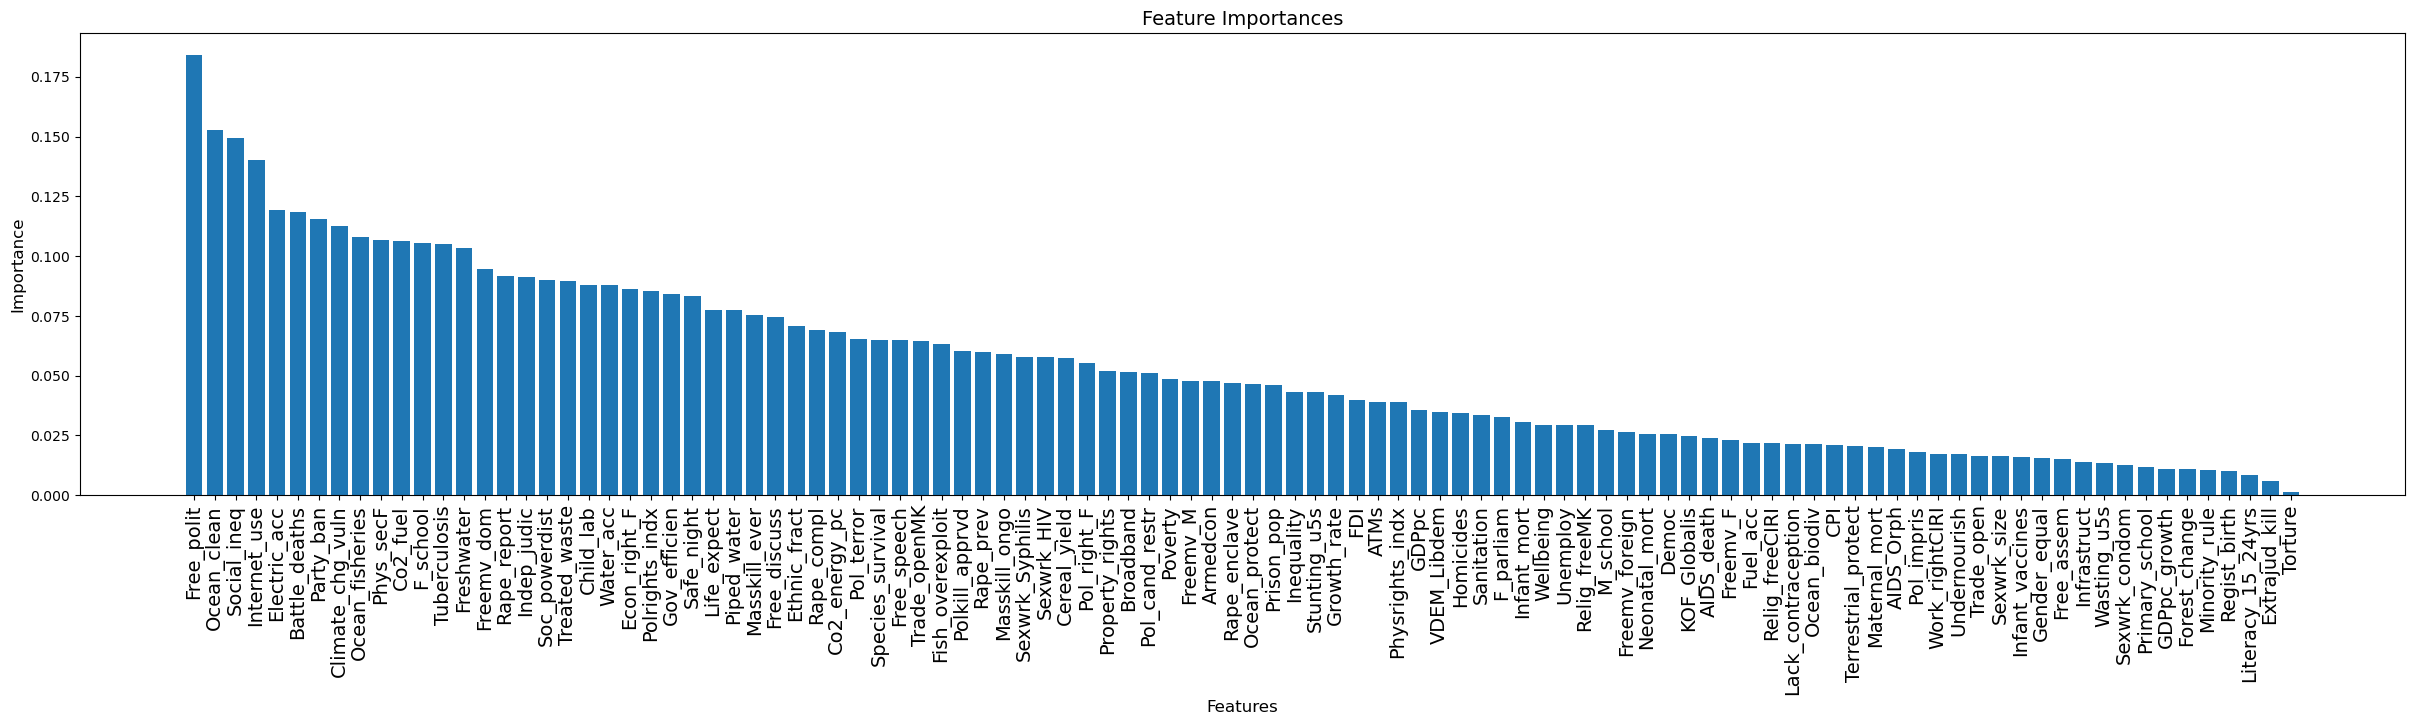

In [34]:

# Plot the feature coefficients
plt.figure(figsize=(30, 6))
plt.bar(range(len(coefficients)), coefficients[np.argsort(abs(coefficients))[::-1]])
plt.xticks(range(len(coefficients)), sorted_features, rotation=90,fontsize=14)
plt.title('Feature Importances',fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Show the chart
plt.show()

In [35]:
# Get the feature coefficients
coefficients = abs(model_LR_2018.coef_)

# Sort the features by coefficient magnitude
sorted_features = x_2018.columns[np.argsort(coefficients)[::-1]]

# Create a dataframe to display the feature coefficients
df_features_lr_2018 = pd.DataFrame({'Features': sorted_features, 'Importance': coefficients[np.argsort(abs(coefficients))[::-1]]})

# Print the dataframe
print(df_features_lr_2018.head(5))

           Features  Importance
0          Co2_fuel    0.380148
1        AIDS_death    0.325415
2  Climate_chg_vuln    0.278004
3         AIDS_Orph    0.185951
4     Co2_energy_pc    0.160897


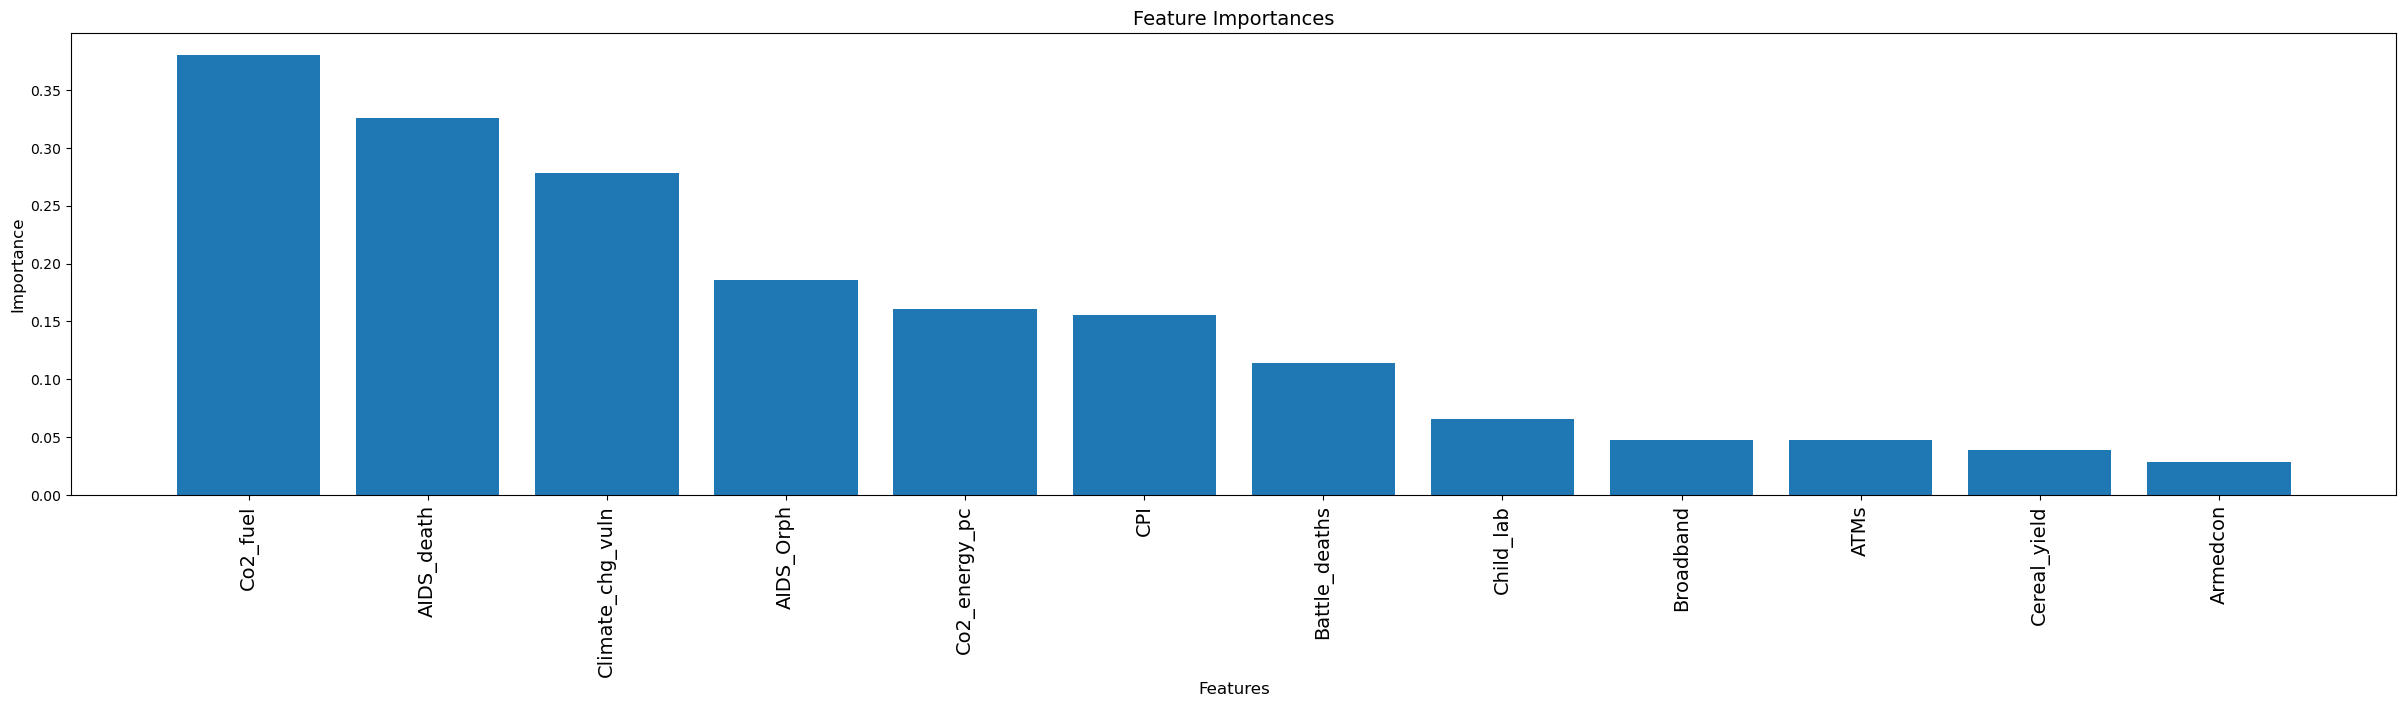

In [36]:

# Plot the feature coefficients
plt.figure(figsize=(30, 6))
plt.bar(range(len(coefficients)), coefficients[np.argsort(abs(coefficients))[::-1]])
plt.xticks(range(len(coefficients)), sorted_features, rotation=90,fontsize=14)
plt.title('Feature Importances',fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Show the chart
plt.show()

Next we proceed with the  DecisionTreeRegressor class from scikit-learn. We created two DecisionTreeRegressor objects for years 2016 and 2018 respectively, setting the hyperparameters for maximum depth and minimum samples per leaf. Fit the training data to the regressor objects using the fit() method. We use the predict() method to make predictions on the test data. We calculated the mean absolute error between the actual and predicted values using the mean_absolute_error() function. MAE are  0.41 and 0.162 for 2016 and 2018 respectively.

In [37]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_regressor_2016 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
dt_regressor_2018 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)


# Train the decision tree regressor on the training data
dt_regressor_2016.fit(x_2016, y_2016)
dt_regressor_2018.fit(x_2018, y_2018)

# Use the trained decision tree regressor to make predictions on the test data
y_pred_2016 = dt_regressor_2016.predict(test_2016.drop(columns='SLAVERY'))
y_pred_2018 = dt_regressor_2018.predict(test_2018.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016_dt = mean_absolute_error(test_2016['SLAVERY'], y_pred_2016)
mae_2018_dt = mean_absolute_error(test_2018['SLAVERY'], y_pred_2018)


print("MAE 2016: ", mae_2016_dt)
print("MAE 2018: ", mae_2018_dt)

MAE 2016:  0.41050099998632883
MAE 2018:  0.1623681526361978


Then we used the feature_importances of our models, to identify the most important features. We also make bar charts that indicate all features for each model their importance score.

For 2016 there were only three features which are  the following in descending order on their importance score:

1.GDPpc (Gross development product per capita), 2.Cereal_yield (Cereal yield), 3.Freshwater (Freshwater withdrawal) 

It is important to mention that GDPpc is the most important feature with important score 0.765 then Cereal_yield with much lower score and Freshwater third with very low score comparing the other two features.

For 2018 the top five features were the following in descending order on their importance score:

1.Neonatal_mort (Neonatal mortality), 2.Piped_water (Improved water source, piped), 3.Property_rights (Property rights), 4.Growth_rate (Adjusted growth rate), 5.Free_discuss (Freedom of discussion).

In [38]:
# Get the feature importances
importances = dt_regressor_2016.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2016.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_dt_2016 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_dt_2016.head(5)

,Features,Importance
0,GDPpc,0.765768
1,Cereal_yield,0.196673
2,Freshwater,0.037558
3,Yrs_of_school,0.000000
4,Homicides,0.000000


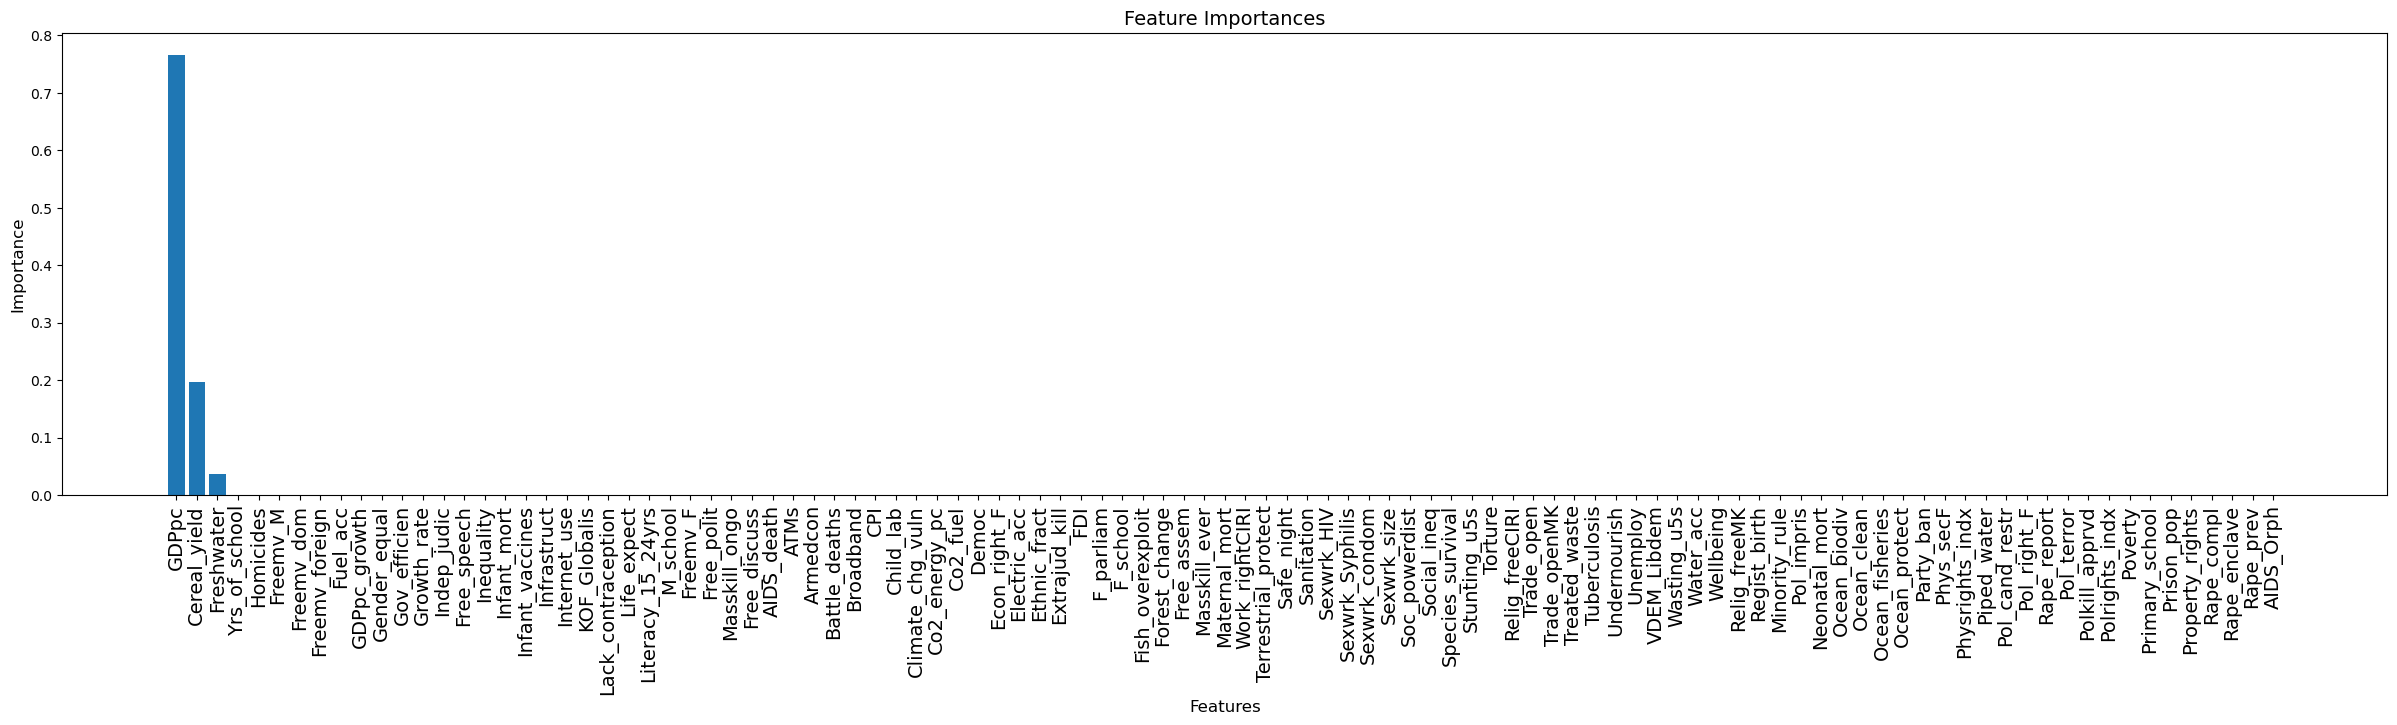

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In [40]:
# Get the feature importances
importances = dt_regressor_2018.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2018.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_dt_2018 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_dt_2018.head(5)

,Features,Importance
0,Neonatal_mort,0.655121
1,Piped_water,0.216944
2,Property_rights,0.067173
3,Growth_rate,0.026512
4,Free_discuss,0.024228


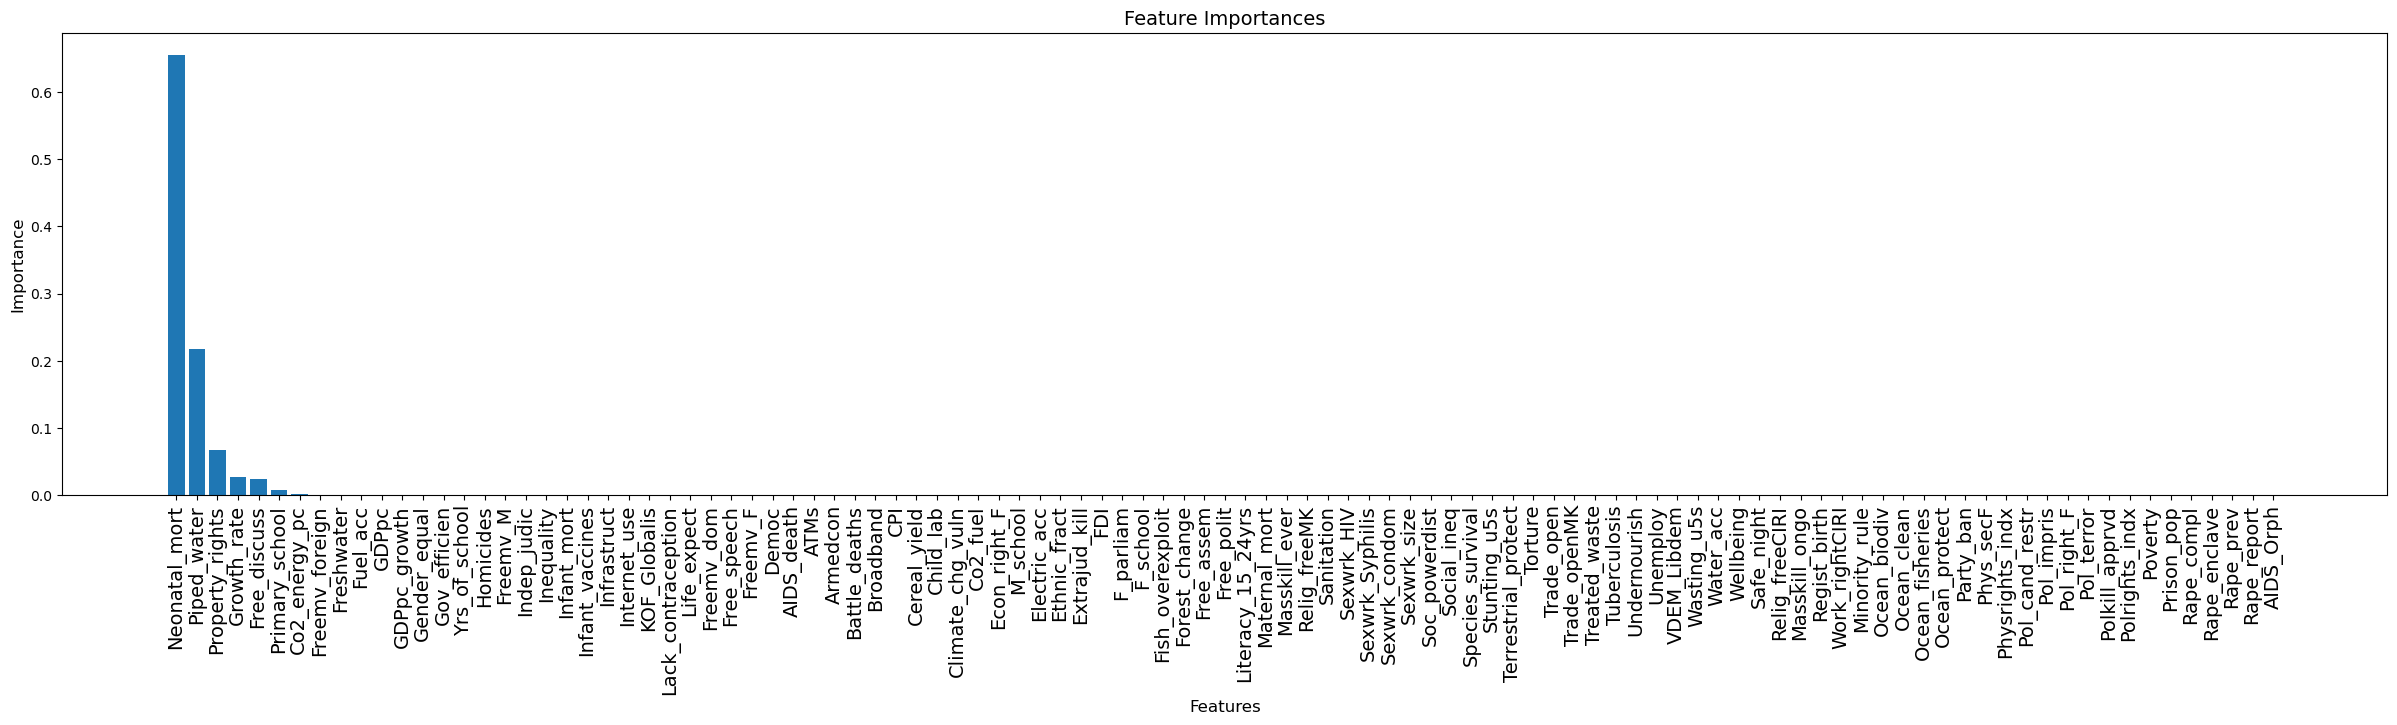

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

Next we proceed with the RandomForestRegressor class from scikit-learn.  We created tworandom forest regressor objects for years 2016 and 2018 respectively, setting the hyperparameters for number of decision trees, maximum depth and minimum samples per leaf. Fit the training data to the regressor objects using the fit() method. We use the predict() method to make predictions on the test data. We calculated the mean absolute error between the actual and predicted values using the mean_absolute_error() function. MAE are 0.26 and 0.172 for 2016 and 2018 respectively.

In [42]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
random.seed(80)

rf_regressor_2016 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5,random_state=42)
rf_regressor_2018 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5,random_state=42)

# Train the random forest regressor on the training data
rf_regressor_2016.fit(x_2016, y_2016)
rf_regressor_2018.fit(x_2018, y_2018)

# Use the trained random forest regressor to make predictions on the test data
y_pred_2016 = rf_regressor_2016.predict(test_2016.drop(columns='SLAVERY'))
y_pred_2018 = rf_regressor_2018.predict(test_2018.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016_rf = mean_absolute_error(test_2016['SLAVERY'], y_pred_2016)
mae_2018_rf = mean_absolute_error(test_2018['SLAVERY'], y_pred_2018)

print("MAE 2016: ", mae_2016_rf)
print("MAE 2018: ", mae_2018_rf)

MAE 2016:  0.28600484178960417
MAE 2018:  0.18310925304500694


Then we used the feature_importances of our models, to identify the most important features. We also make bar charts that indicate all features for each model their importance score.

For 2016 there were only three features which are  the following in descending order on their importance score:

1.Property_rights (Property rights), 2.Internet use (Internet use), 3.Prison_pop (Prison population ), 4.CPI (Corruption Perception Index), 5.Free_discuss (Freedom of discussion).

For 2018 the top five features were the following in descending order on their importance score:

1.Internet use (Internet use), 2.Water_acc (Access to improved water), 3.Piped_water (Improved water source, piped), 4.Climate_chg_vuln (Climate change vulnerability), 5.Tuberculosis (Incidence of tuberculosis).

In [43]:
# Get the feature importances
importances = rf_regressor_2016.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2016.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_2016 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_2016.head(5)

,Features,Importance
0,Internet_use,0.117375
1,Property_rights,0.100579
2,Ocean_protect,0.094719
3,Prison_pop,0.085345
4,CPI,0.075582


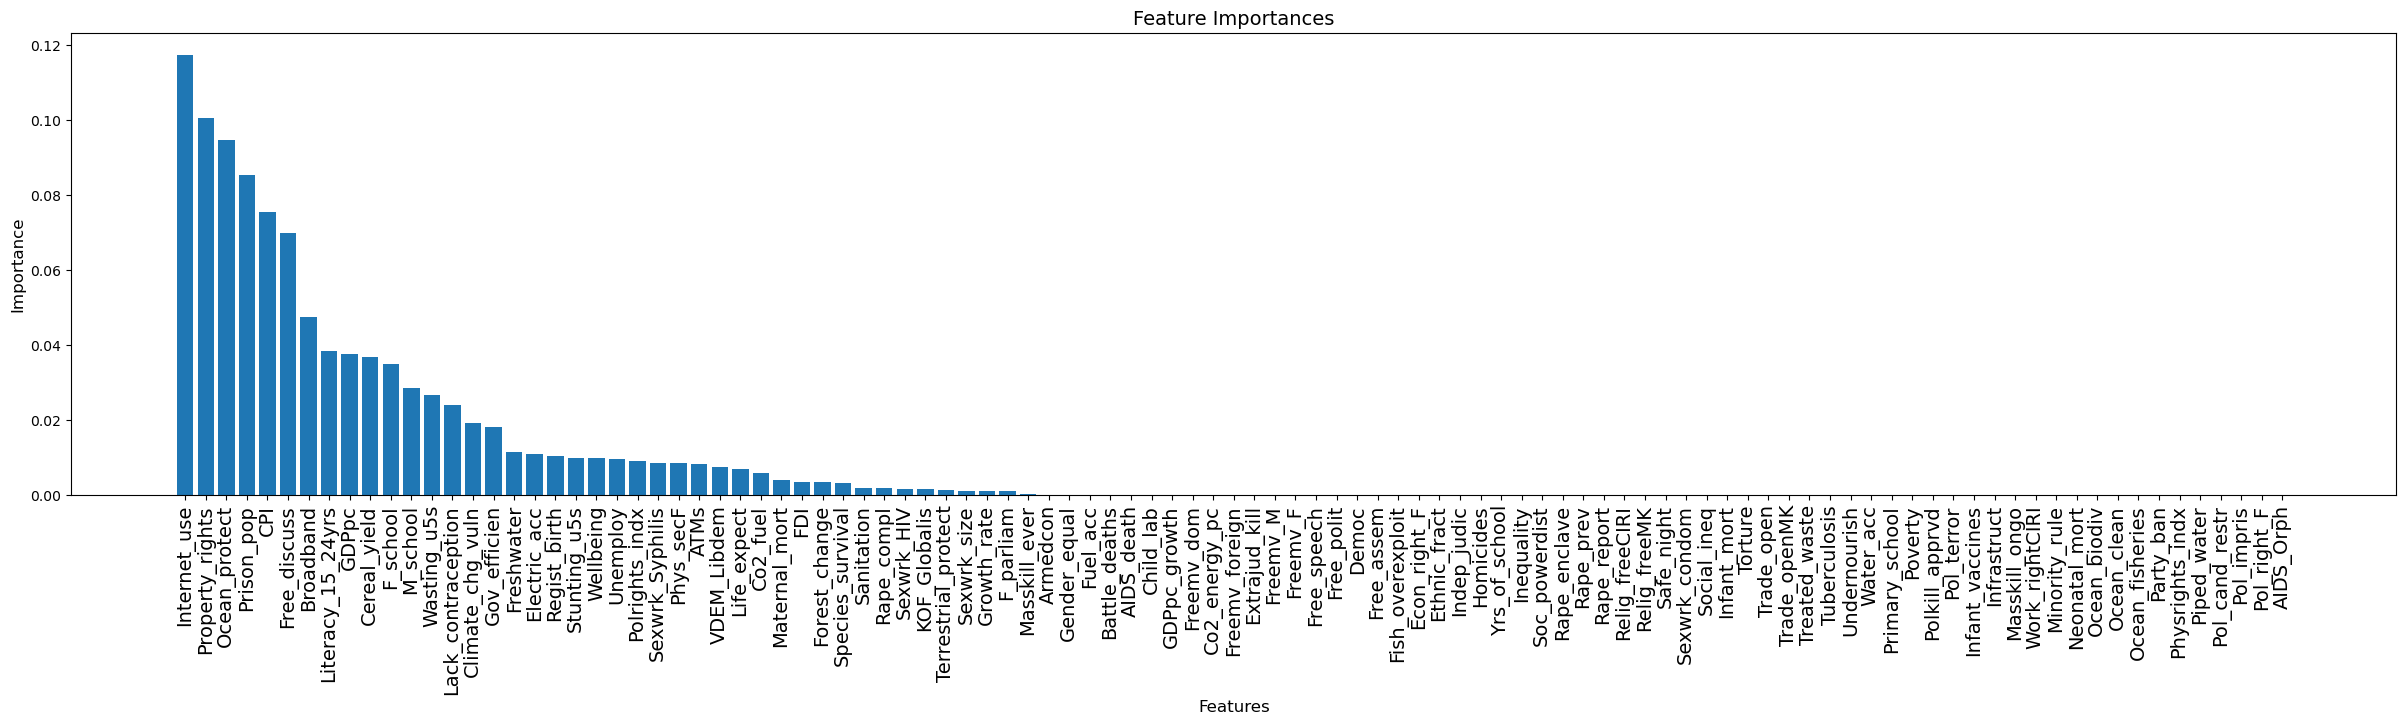

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In [45]:
# Get the feature importances
importances = rf_regressor_2018.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2018.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_2018 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_2018.head(5)

,Features,Importance
0,Internet_use,0.175280
1,Water_acc,0.105503
2,Piped_water,0.071448
3,Climate_chg_vuln,0.066938
4,F_school,0.064155


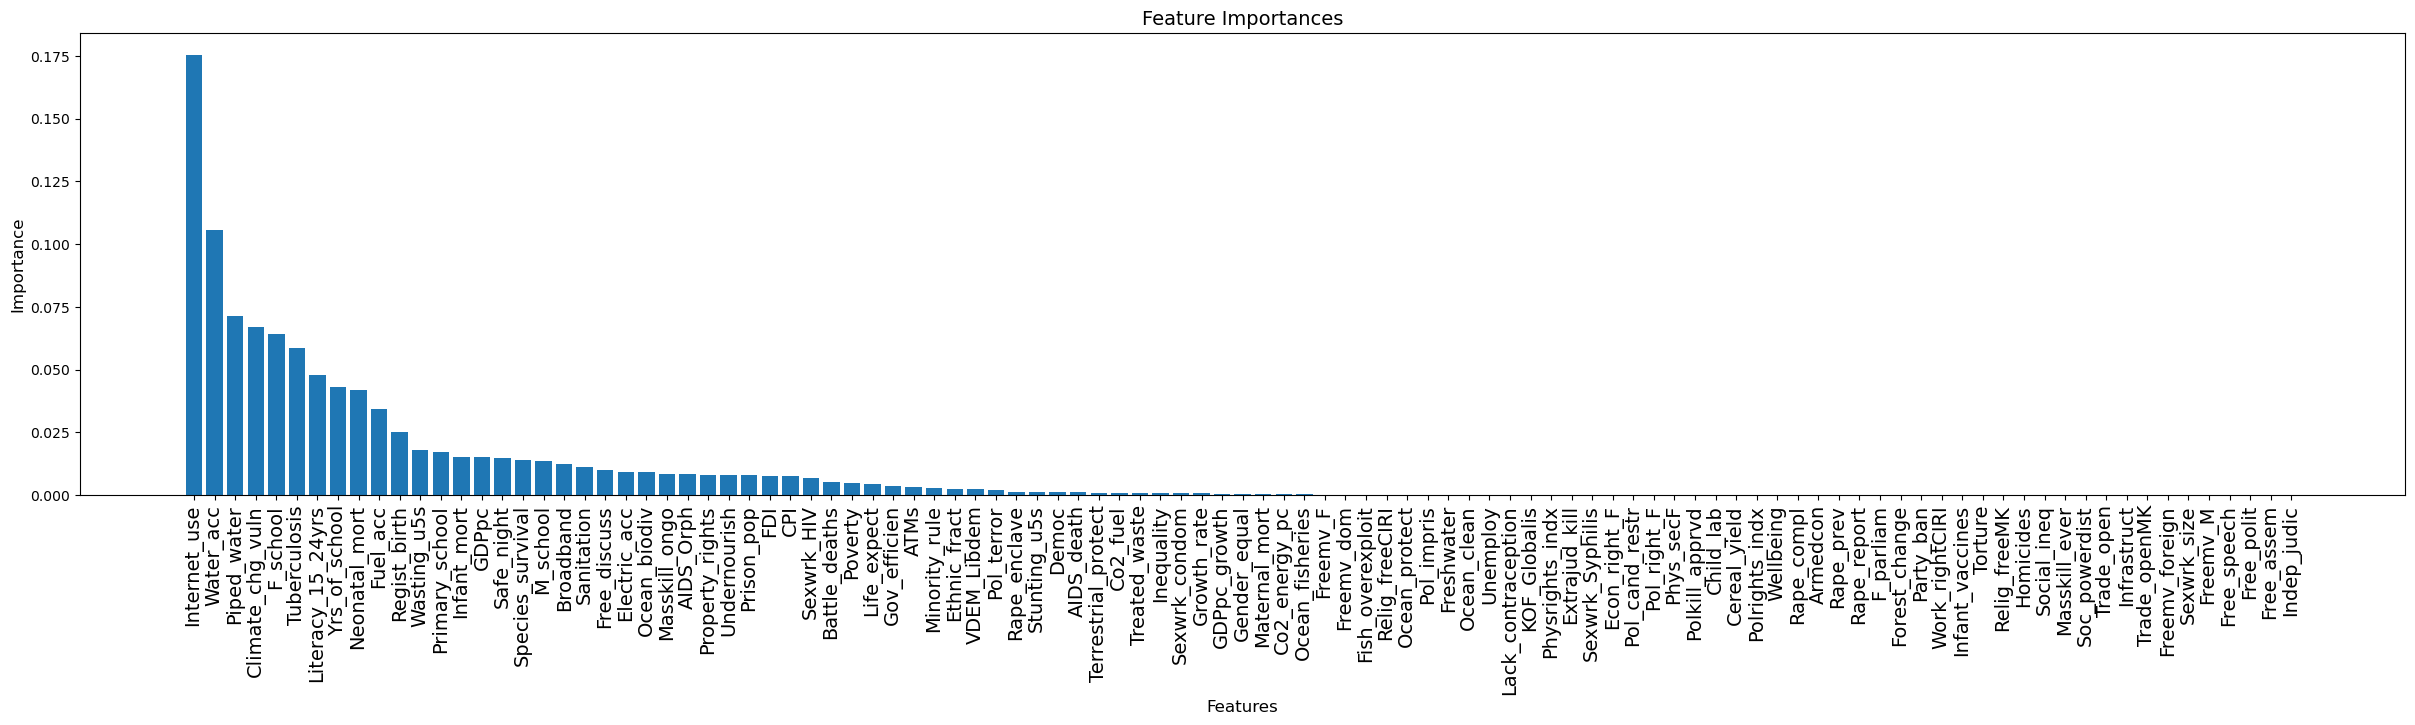

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In [47]:
all_MAE_2016=[mae_2016_rf, mae_2016_dt, mae_2016_lr]
all_MAE_2018=[mae_2018_rf, mae_2018_dt, mae_2018_lr]
print(all_MAE_2016)
print(all_MAE_2018)


[0.28600484178960417, 0.41050099998632883, 0.35495203986450485]
[0.18310925304500694, 0.1623681526361978, 0.19225167412099775]


From our analysis in the second question of the project we end that for 2016 the model with lower MAE is the random forest model and for 2018 the decision tree model.

# Question 3

In question 3 we had to implement exactly the same models with those in question 2, but with the difference that in this situation the  input features in each model is a subset of 35 features that is indicated by the paper.

Below is presented the subset of 35 features.

In [48]:
features_keep = ['SLAVERY','KOF_Globalis','Work_rightCIRI','Trade_open','GDPpc',
 'Armedcon','Poverty', 'Stunting_u5s','Undernourish','Wasting_u5s','Maternal_mort',
 'Neonatal_mort','Literacy_15_24yrs','F_school','ATMs','Child_lab','Unemploy','Infrastruct',
 'Internet_use','Broadband','Climate_chg_vuln','CPI','Minority_rule','Freemv_M',
 'Freemv_F','Free_discuss','Soc_powerdist','Democ',
 'Sexwrk_condom','Sexwrk_Syphilis','AIDS_Orph','Rape_report',
 'Rape_enclave','Phys_secF','Gender_equal']
len(features_keep)

35

Then we modify our train and test datasets for both years, in a way to contain only the 35 features that we discussed.

In [49]:
train_2016_35=train_2016[features_keep]
train_2018_35=train_2018[features_keep]
test_2016_35=test_2016[features_keep]
test_2018_35=test_2018[features_keep]

In [50]:
x_2016 = train_2016_35.drop(columns='SLAVERY')
y_2016 = train_2016_35['SLAVERY']

x_2018 = train_2018_35.drop(columns='SLAVERY')
y_2018 = train_2018_35['SLAVERY']

Following we implemented exactly the same methods and models as in question 2, with the only difference that we did not used lasso and ridge regression for variable selection before the linear regression model.

In linear regression MAE are 0.372 and 0.262 for 2016 and 2018 respectively, and compared with those in Q2( MAE are 0.37 and 0.192 for 2016 and 2018 respectively) we observe that in both cases the models of q2 perform better, as the MAE are lower.

In [51]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



# create a linear regression model
model_LR_2016 = LinearRegression()
model_LR_2018 = LinearRegression()

# fit the model to the training data
model_LR_2016.fit(x_2016, y_2016)

model_LR_2018.fit(x_2018, y_2018)


# make predictions on the testing data
y_pred_2016 = model_LR_2016.predict(test_2016_35.drop(columns='SLAVERY'))
y_pred_2018 = model_LR_2018.predict(test_2018_35.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016_lr_35f = mean_absolute_error(test_2016_35['SLAVERY'], y_pred_2016)
mae_2018_lr_35f = mean_absolute_error(test_2018_35['SLAVERY'], y_pred_2018)


print("MAE 2016: ", mae_2016_lr_35f)
print("MAE 2018: ", mae_2018_lr_35f)


MAE 2016:  0.39178616198689464
MAE 2018:  0.2825341981859683


Then we used the coefficients of our models, to identify the most important features. We also make bar charts that indicate all features for each model their importance score.

For 2016 the top five features were the following in descending order on their importance score:

1.Climate_chg_vuln (Climate change vulnerability), 2.AIDS_Orph (AIDS orphans), 3.Stunting_u5s (Prevalence of stunting, under- 5s), 4.CPI (Corruption Perception Index), 5.Rape_report (Taboo and security for wonen reporting rape)

Also the feature Climate_chg_vuln exist in the top 5 features of both q2 and q3 models.

For 2018 the top five features were the following in descending order on their importance score:

1.Neonatal_mort (Neonatal mortality ), 2.GDPpc (Gross development product per capita), 3.Broadband (Mobile broadband subscriptions), 4.Free_discuss (Freedom of discussion), 5.ATMs (Automated teller machines).

No common features in the top 5 features of q2 and q3 models.

In [52]:
# Get the feature coefficients
coefficients = abs(model_LR_2016.coef_)

# Sort the features by coefficient magnitude
sorted_features = x_2016.columns[np.argsort(coefficients)[::-1]]

# Create a dataframe to display the feature coefficients
df_features_lr_2016_35 = pd.DataFrame({'Features': sorted_features, 'Importance': coefficients[np.argsort(abs(coefficients))[::-1]]})

# Print the dataframe
print(df_features_lr_2016_35.head(5))

           Features  Importance
0               CPI    0.911471
1  Climate_chg_vuln    0.843928
2         AIDS_Orph    0.702606
3             GDPpc    0.655444
4        Trade_open    0.576947


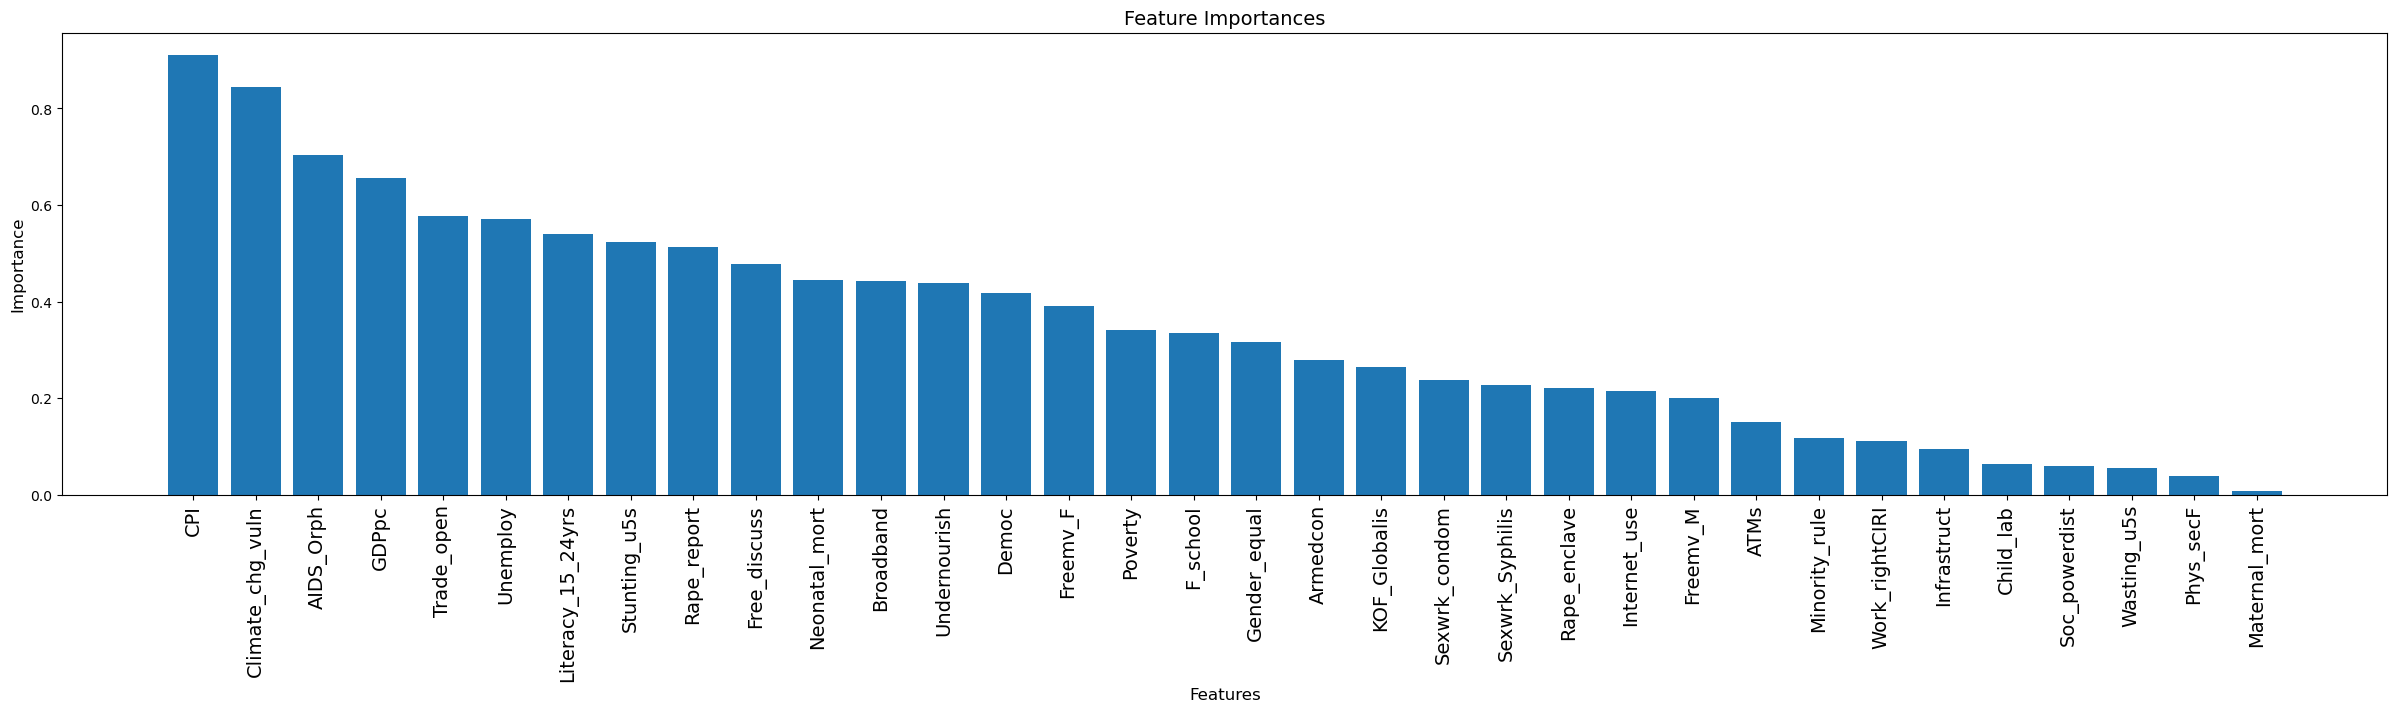

In [53]:
# Plot the feature coefficients
plt.figure(figsize=(30, 6))
plt.bar(range(len(coefficients)), coefficients[np.argsort(abs(coefficients))[::-1]])
plt.xticks(range(len(coefficients)), sorted_features, rotation=90,fontsize=14)
plt.title('Feature Importances',fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Show the chart
plt.show()

In [54]:
common_elements = np.intersect1d(df_features_lr_2016['Features'].head(5), df_features_lr_2016_35['Features'].head(5))
common_elements

array([], dtype=object)

In [55]:
# Get the feature coefficients
coefficients = abs(model_LR_2018.coef_)

# Sort the features by coefficient magnitude
sorted_features = x_2018.columns[np.argsort(coefficients)[::-1]]

# Create a dataframe to display the feature coefficients
df_features_lr_2018_35 = pd.DataFrame({'Features': sorted_features, 'Importance': coefficients[np.argsort(abs(coefficients))[::-1]]})

# Print the dataframe
print(df_features_lr_2018_35.head(5))

        Features  Importance
0  Neonatal_mort    0.824954
1  Maternal_mort    0.728671
2            CPI    0.719520
3    Infrastruct    0.626371
4          GDPpc    0.584679


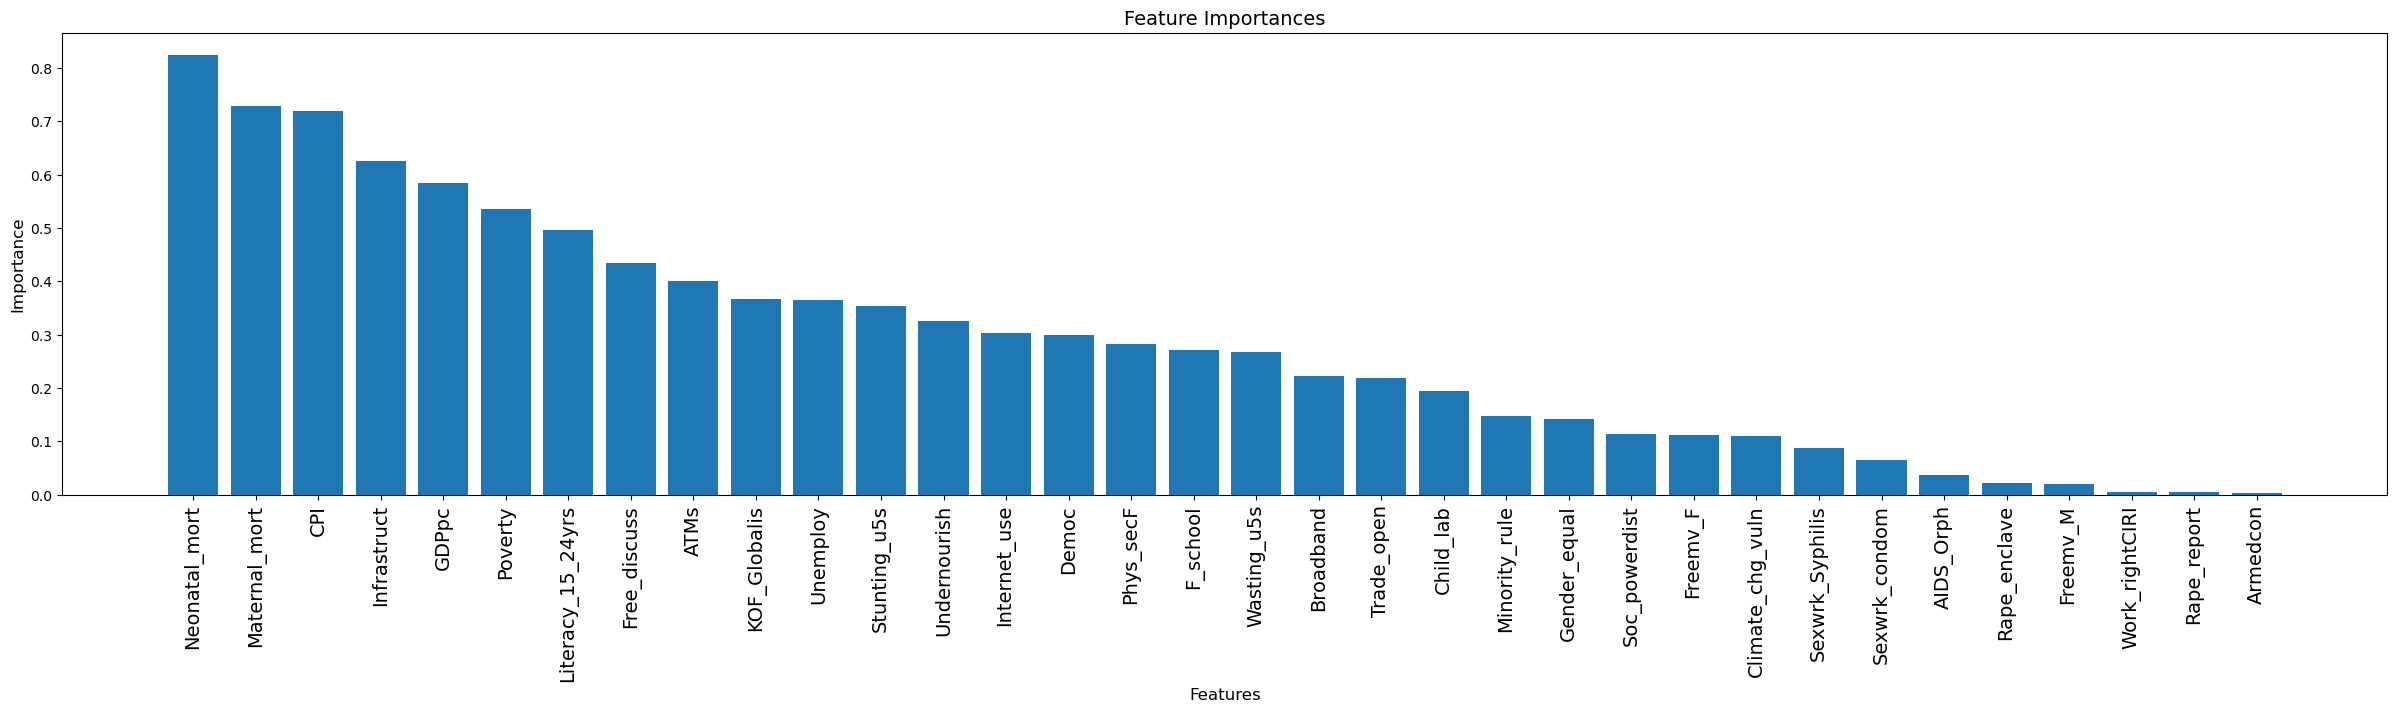

In [56]:

# Plot the feature coefficients
plt.figure(figsize=(30, 6))
plt.bar(range(len(coefficients)), coefficients[np.argsort(abs(coefficients))[::-1]])
plt.xticks(range(len(coefficients)), sorted_features, rotation=90,fontsize=14)
plt.title('Feature Importances',fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)

# Show the chart
plt.show()

In [57]:
common_elements = np.intersect1d(df_features_lr_2018['Features'].head(5), df_features_lr_2018_35['Features'].head(5))
common_elements

array([], dtype=object)

In decision trees, MAE are 0.39 and 0.199 for 2016 and 2018 respectively, and compared with those in Q2( MAE are 0.41 and 0.162 for 2016 and 2018 respectively) we observe that only 2016 model as the MAE is lower. However differences are very low.

In [58]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor


dt_regressor_2016 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
dt_regressor_2018 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)


# Train the decision tree regressor on the training data
dt_regressor_2016.fit(x_2016, y_2016)
dt_regressor_2018.fit(x_2018, y_2018)

# Use the trained decision tree regressor to make predictions on the test data
y_pred_2016 = dt_regressor_2016.predict(test_2016_35.drop(columns='SLAVERY'))
y_pred_2018 = dt_regressor_2018.predict(test_2018_35.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016_dt_35 = mean_absolute_error(test_2016_35['SLAVERY'], y_pred_2016)
mae_2018_dt_35 = mean_absolute_error(test_2018_35['SLAVERY'], y_pred_2018)


print("MAE 2016: ", mae_2016_dt_35)
print("MAE 2018: ", mae_2018_dt_35)

MAE 2016:  0.3903722775399352
MAE 2018:  0.20083498274511843


Then we used the feature_importances of our models, to identify the most important features. We also make bar charts that indicate all features for each model their importance score.

For 2016 there were only three features which are the following in descending order on their importance score:

1.GDPpc (Gross development product per capita), 2.Free_discuss (Freedom of discussion)

Also the feature GDPpc exists in the top 5 features of both q2 and q3 models.

It is important to mention that GDPpc is the most important feature with important score 0.765 then Cereal_yield with much lower score and Freshwater third with very low score comparing the other two features.

For 2018 the top five features were the following in descending order on their importance score:

1.Neonatal_mort (Neonatal mortality), 2.Internet_use (Internet use), 3.Climate_chg_vuln (Climate change vulnerability), 4.Free_discuss (Freedom of discussion), 5.Democ (Polity type: Democracy).

Also the features 'Free_discuss', 'Neonatal_mort' exist in the top 5 features of both q2 and q3 models.

In [59]:
# Get the feature importances
importances = dt_regressor_2016.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2016.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_dt_2016_35 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_dt_2016_35.head(5)

,Features,Importance
0,GDPpc,0.896005
1,Free_discuss,0.103995
2,Gender_equal,0.000000
3,ATMs,0.000000
4,F_school,0.000000


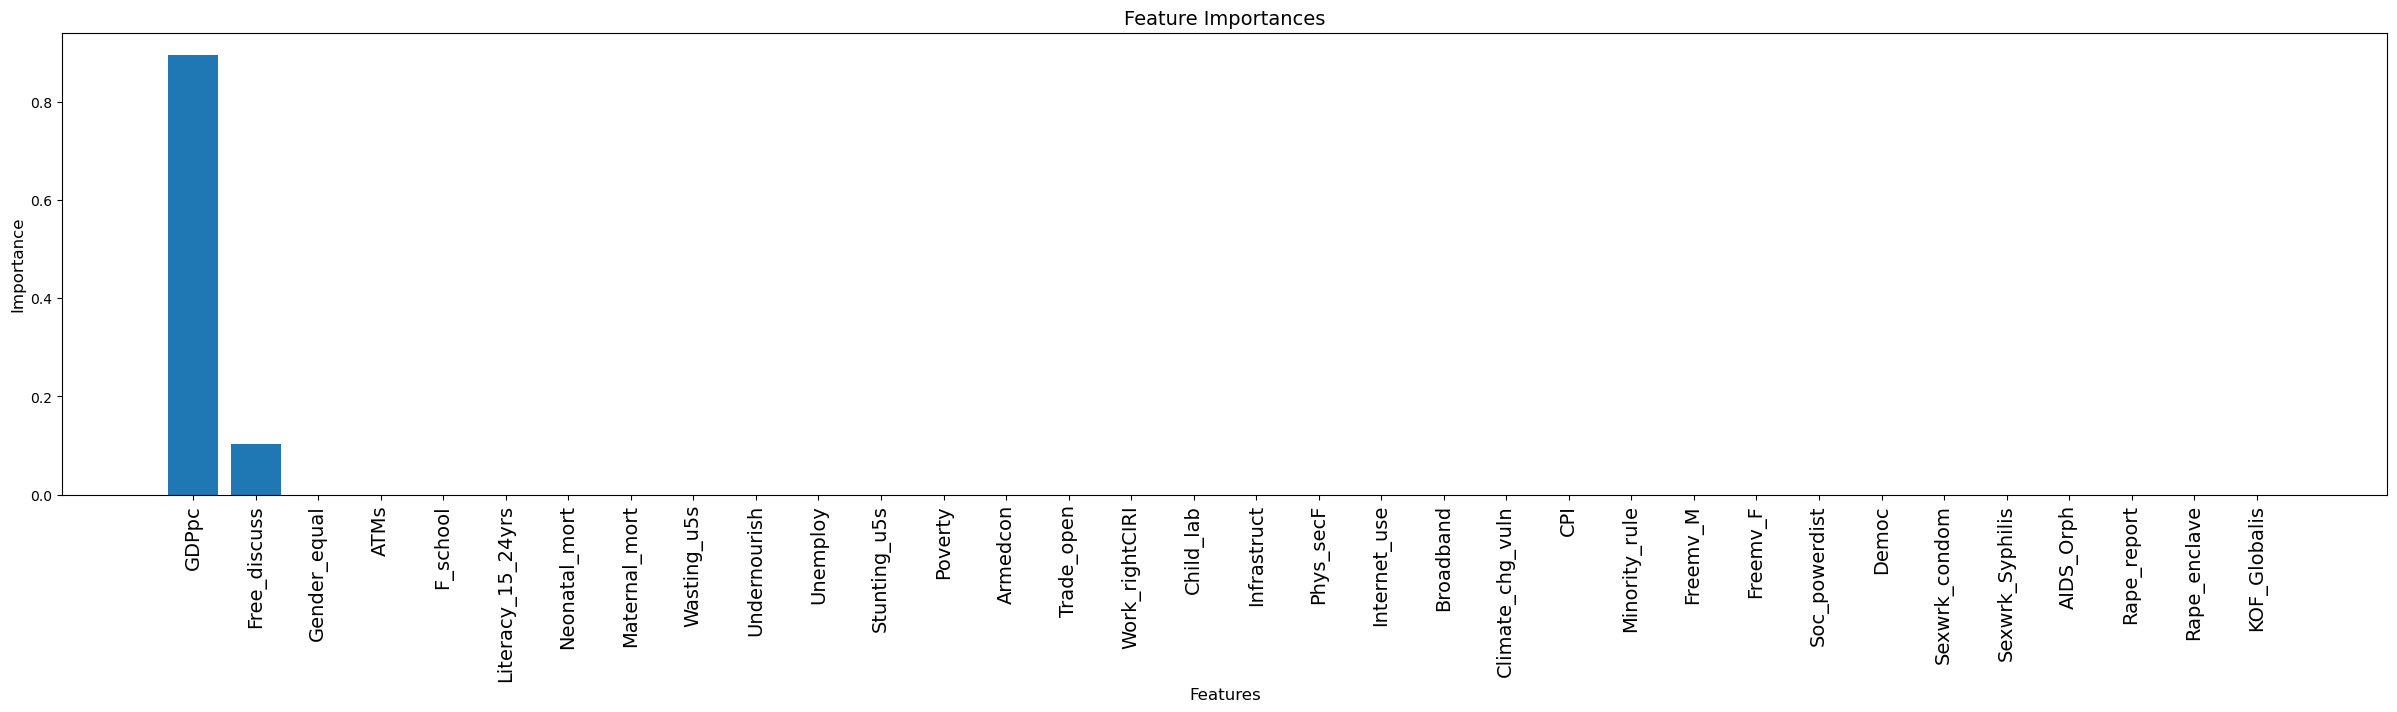

In [60]:
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In [61]:
common_elements = np.intersect1d(df_importances_dt_2016['Features'].head(5), df_importances_dt_2016_35['Features'].head(5))
common_elements

array(['GDPpc'], dtype=object)

In [62]:
# Get the feature importances
importances = dt_regressor_2018.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2018.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_dt_2018_35 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_dt_2018_35.head(5)

,Features,Importance
0,Neonatal_mort,0.642589
1,Internet_use,0.193643
2,Rape_report,0.077459
3,Climate_chg_vuln,0.075085
4,Democ,0.008322


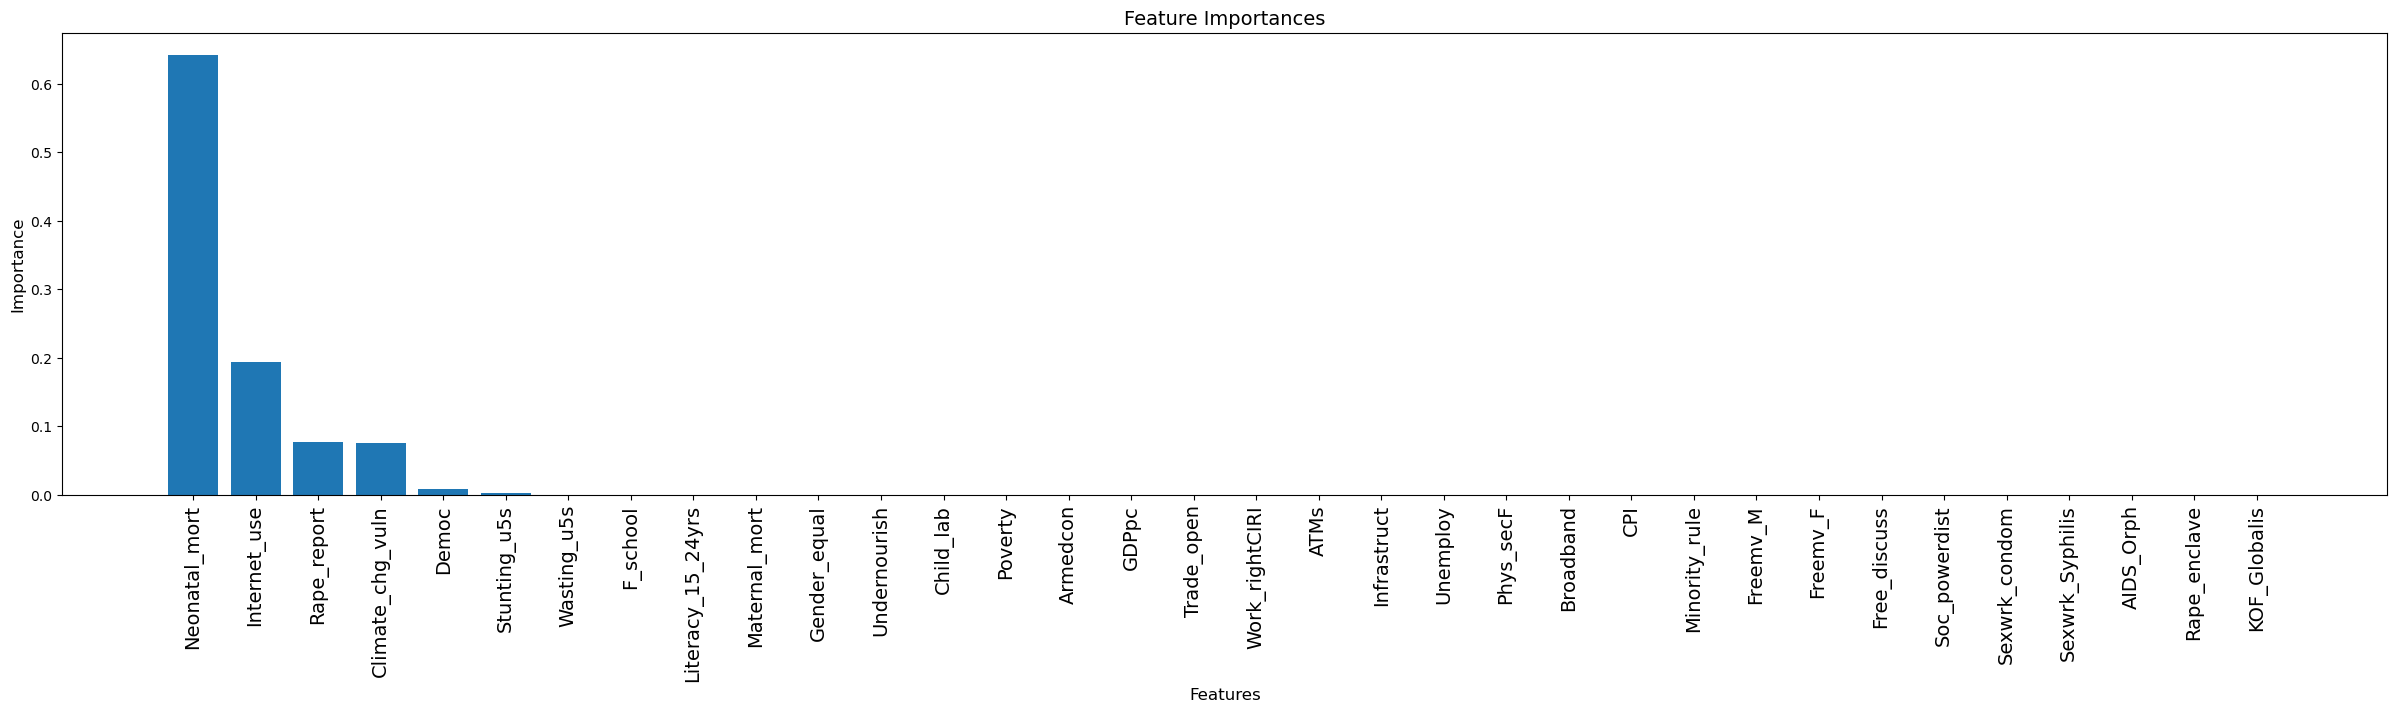

In [63]:
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In random forest, MAE are 0.237 and 0.19 for 2016 and 2018 respectively, and compared with those in Q2( MAE are 0.26 and 0.172 for 2016 and 2018 respectively) we observe that only 2016 model as the MAE is lower. However differences are very low.

In [64]:
common_elements = np.intersect1d(df_importances_dt_2018['Features'].head(5), df_importances_dt_2018_35['Features'].head(5))
common_elements

array(['Neonatal_mort'], dtype=object)

In [65]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_regressor_2016 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5,random_state=47)
rf_regressor_2018 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5,random_state=47)

# Train the random forest regressor on the training data
rf_regressor_2016.fit(x_2016, y_2016)
rf_regressor_2018.fit(x_2018, y_2018)

# Use the trained random forest regressor to make predictions on the test data
y_pred_2016 = rf_regressor_2016.predict(test_2016_35.drop(columns='SLAVERY'))
y_pred_2018 = rf_regressor_2018.predict(test_2018_35.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016_rf_35 = mean_absolute_error(test_2016_35['SLAVERY'], y_pred_2016)
mae_2018_rf_35 = mean_absolute_error(test_2018_35['SLAVERY'], y_pred_2018)

print("MAE 2016: ", mae_2016_rf_35)
print("MAE 2018: ", mae_2018_rf_35)

MAE 2016:  0.24793984822847273
MAE 2018:  0.18671737627473478


Then we used the feature_importances of our models, to identify the most important features. We also make bar charts that indicate all features for each model their importance score.

For 2016 there were only three features which are the following in descending order on their importance score:

1.CPI (Corruption Perception Index), 2.M_school (Female labor force participation), 3.Internet_use (Internet use), 4.Prison_pop (Prison population), 5.Literacy_15_24yrs (Literacy rate of 15-24 year olds).

Also the features 'CPI', 'Free_discuss', 'Internet_use' exist in the top 5 features of both q2 and q3 models.

For 2018 the top five features were the following in descending order on their importance score:

1.Internet use (Internet use), 2.Water_acc (Access to improved water), 3.Piped_water (Improved water source, piped), 4.Climate_chg_vuln (Climate change vulnerability), 5.Yrs_of_school (Expected years of schooling).

Also the features 'Climate_chg_vuln', 'Internet_use' exist in the top 5 features of both q2 and q3 models.

In [66]:
# Get the feature importances
importances = rf_regressor_2016.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2016.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_rf_2016_35 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_rf_2016_35.head(5)

,Features,Importance
0,CPI,0.205438
1,Internet_use,0.146587
2,Free_discuss,0.124678
3,Literacy_15_24yrs,0.098532
4,F_school,0.058495


In [67]:
common_elements = np.intersect1d(df_importances_2016['Features'].head(5), df_importances_rf_2016_35['Features'].head(5))
common_elements

array(['CPI', 'Internet_use'], dtype=object)

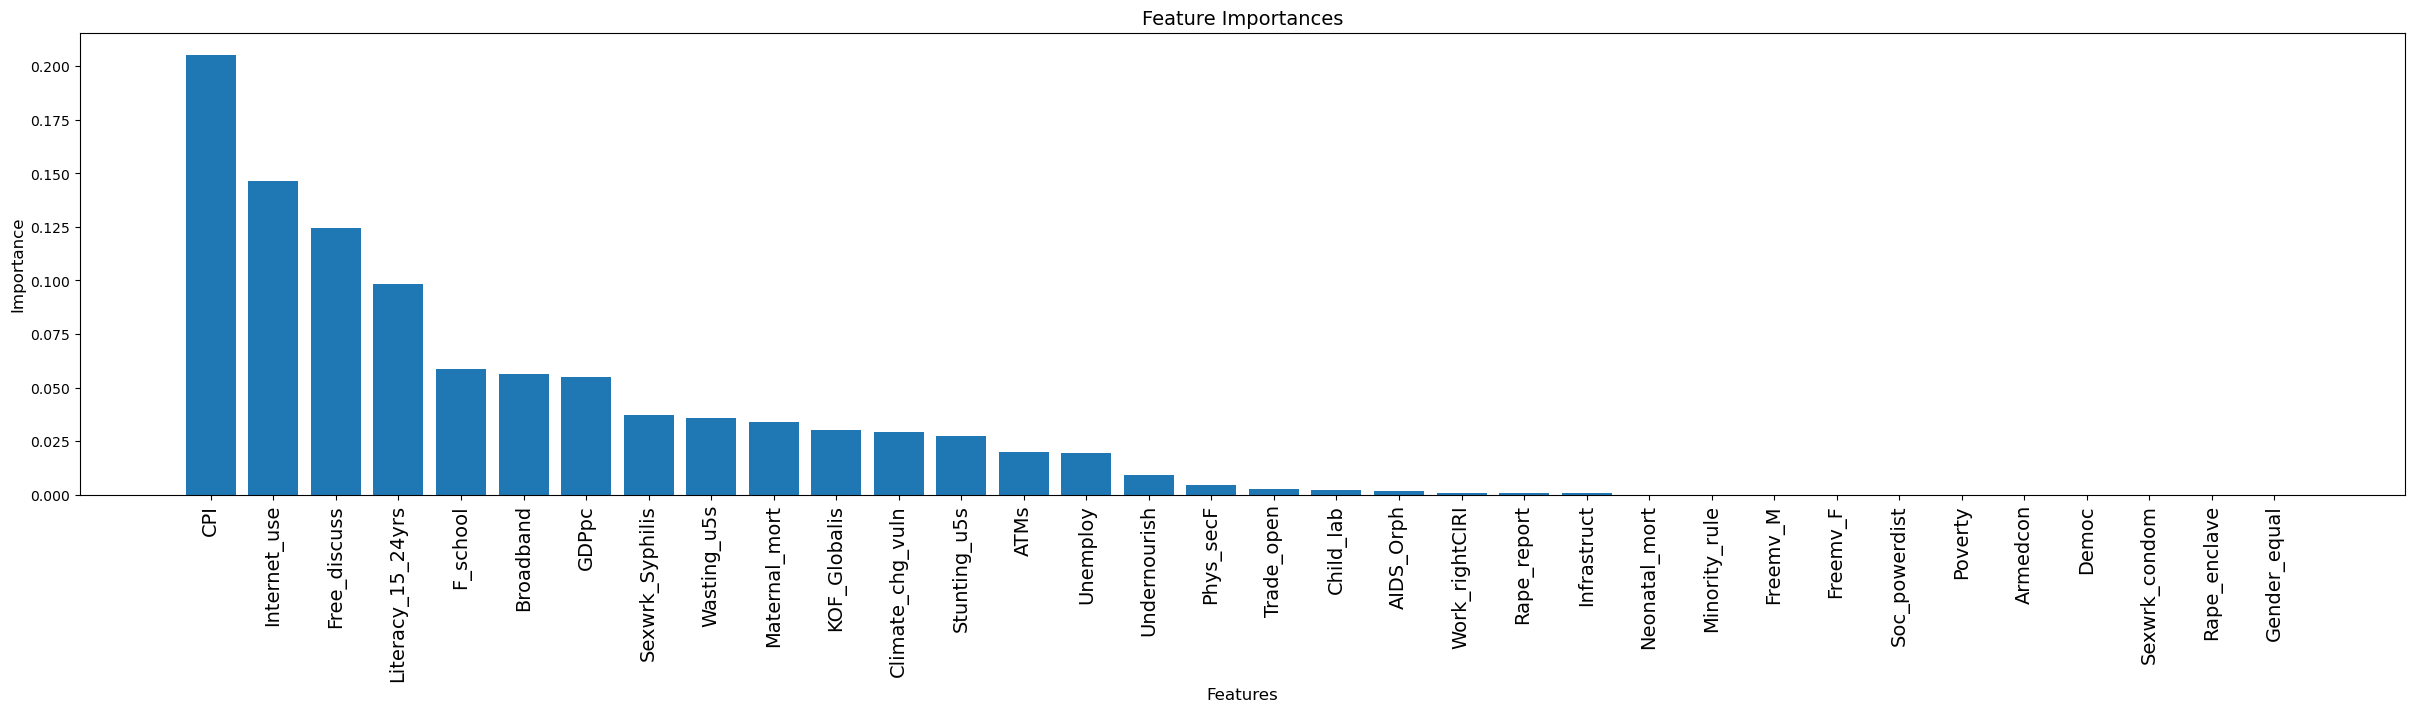

In [68]:
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In [69]:
# Get the feature importances
importances = rf_regressor_2018.feature_importances_
importances

# Sort the features by importance
sorted_features = x_2018.columns[np.argsort(importances)[::-1]]

# Create a dataframe to display the feature importances
df_importances_rf_2018_35 = pd.DataFrame({'Features': sorted_features, 'Importance': importances[np.argsort(importances)[::-1]]})
df_importances_rf_2018_35.head(5)

,Features,Importance
0,Internet_use,0.404662
1,Climate_chg_vuln,0.094798
2,Broadband,0.081682
3,GDPpc,0.068590
4,Neonatal_mort,0.068290


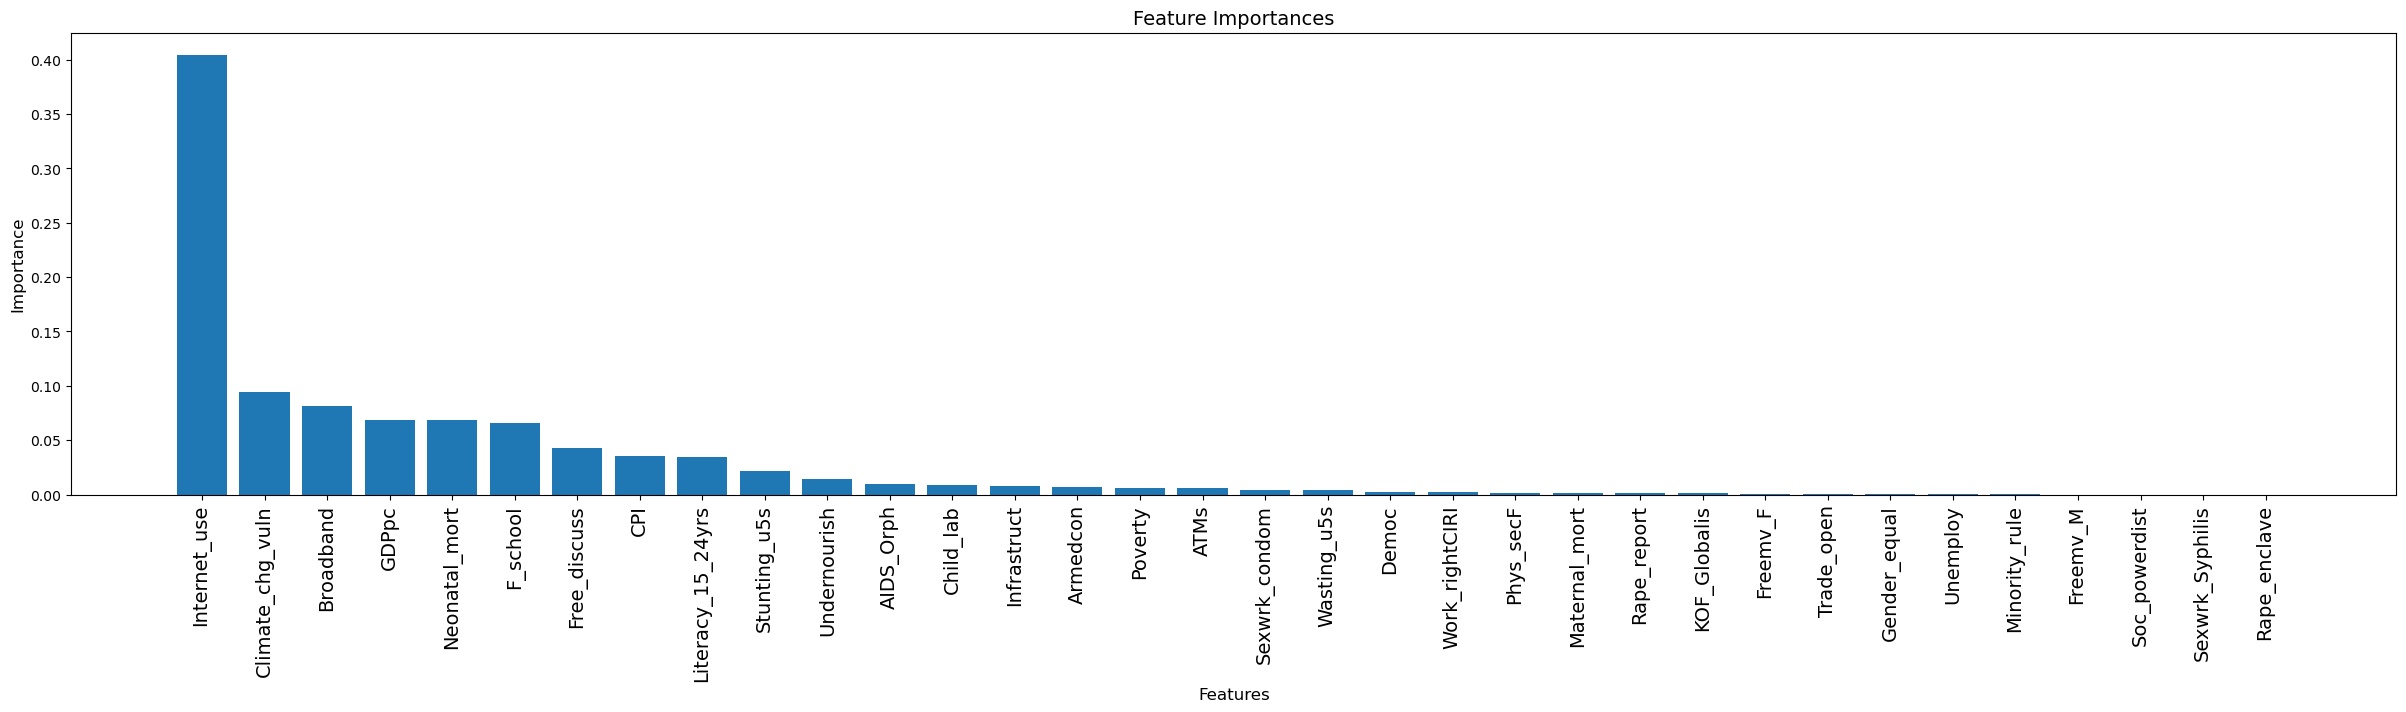

In [70]:
plt.figure(figsize=(30, 6))
plt.bar(range(len(importances)), importances[np.argsort(importances)[::-1]])
plt.xticks(range(len(importances)), sorted_features, rotation=90, fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Show the chart
plt.show()

In [71]:
common_elements = np.intersect1d(df_importances_2018['Features'].head(5), df_importances_rf_2018_35['Features'].head(5))
common_elements

array(['Climate_chg_vuln', 'Internet_use'], dtype=object)

In [72]:
all_MAE_2016_35=[mae_2016_rf_35, mae_2016_dt_35, mae_2016_lr_35f]
all_MAE_2018_35=[mae_2018_rf_35, mae_2018_dt_35, mae_2018_lr_35f]
print(all_MAE_2016_35)
print(all_MAE_2018_35)


[0.24793984822847273, 0.3903722775399352, 0.39178616198689464]
[0.18671737627473478, 0.20083498274511843, 0.2825341981859683]


From our analysis in the third question of the project we end up that for both 2016 and the model with lower MAE is the random forest.

# Question 4

For question 4 we used Principal Component Analysis (PCA) in order to reduce the full set of features to six features.

First we used pca for our test datasets for both years.

We used the PCA class from the sklearn.decomposition module.

We created two instances of the PCA class , one for each year of our data , each with 6 components.

The data is prepared for PCA by dropping the target variable from the training data and then applying the fit_transform method of the PCA object to obtain the transformed data. The transformed data is then stored in two DataFrames. 



In [73]:
from sklearn.decomposition import PCA
pca_2016 = PCA(n_components=6)
pca_2018 = PCA(n_components=6)

##PCA to train data
X_pca_train_2016=train_2016.drop(columns='SLAVERY')
X_pca_train_2016=pca_2016.fit_transform(X_pca_train_2016)
df_pca_train_2016=pd.DataFrame(X_pca_train_2016, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
df_pca_train_2016['SLAVERY'] = train_2016['SLAVERY']


X_pca_train_2018=train_2018.drop(columns='SLAVERY')
X_pca_train_2018=pca_2018.fit_transform(X_pca_train_2018)
df_pca_train_2018=pd.DataFrame(X_pca_train_2018, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
df_pca_train_2018['SLAVERY']=train_2018['SLAVERY']




Then in order to interpet the derived features, we created a dataframe which contains the contributions of each one of the 6 components with the initial features. Then we got the top 10 features for each component, and created a dataframe for each year (components_top_10_features_2016, components_top_10_features_2018) that present the features that affect the most each component. 

For 2016 the most highly scored features for each component are the following (Freemv_F	Relig_freeCIRI	Rape_enclave	Minority_rule	Minority_rule	Relig_freeCIRI)

For 2018 the most highly scored features for each component are the following (Armedcon	Relig_freeCIRI	Masskill_ever	Minority_rule	Democ	Relig_freeCIRI).

In [74]:
# get the loading vectors
loadings = pca_2016.components_

# create a dataframe to store the contribution of each variable to each component
component_df_2016 = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=train_2016.drop(columns='SLAVERY').columns)

# get the loading vectors
loadings = pca_2018.components_

# create a dataframe to store the contribution of each variable to each component
component_df_2018 = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=train_2018.drop(columns='SLAVERY').columns)



In [75]:
PC1_TOP10_FEATURES_2016=component_df_2016['PC1'].abs().sort_values(ascending=False).head(10).index.tolist()
PC2_TOP10_FEATURES_2016=component_df_2016['PC2'].abs().sort_values(ascending=False).head(10).index.tolist()
PC3_TOP10_FEATURES_2016=component_df_2016['PC3'].abs().sort_values(ascending=False).head(10).index.tolist()
PC4_TOP10_FEATURES_2016=component_df_2016['PC4'].abs().sort_values(ascending=False).head(10).index.tolist()
PC5_TOP10_FEATURES_2016=component_df_2016['PC5'].abs().sort_values(ascending=False).head(10).index.tolist()
PC6_TOP10_FEATURES_2016=component_df_2016['PC6'].abs().sort_values(ascending=False).head(10).index.tolist()

PC1_TOP10_FEATURES_2018=component_df_2018['PC1'].abs().sort_values(ascending=False).head(10).index.tolist()
PC2_TOP10_FEATURES_2018=component_df_2018['PC2'].abs().sort_values(ascending=False).head(10).index.tolist()
PC3_TOP10_FEATURES_2018=component_df_2018['PC3'].abs().sort_values(ascending=False).head(10).index.tolist()
PC4_TOP10_FEATURES_2018=component_df_2018['PC4'].abs().sort_values(ascending=False).head(10).index.tolist()
PC5_TOP10_FEATURES_2018=component_df_2018['PC5'].abs().sort_values(ascending=False).head(10).index.tolist()
PC6_TOP10_FEATURES_2018=component_df_2018['PC6'].abs().sort_values(ascending=False).head(10).index.tolist()


In [76]:
components_top_10_features_2016=pd.DataFrame({'PCA1':PC1_TOP10_FEATURES_2016,'PCA2':PC2_TOP10_FEATURES_2016,'PCA3':PC3_TOP10_FEATURES_2016,'PCA4':PC4_TOP10_FEATURES_2016,'PCA5':PC5_TOP10_FEATURES_2016,'PCA6':PC2_TOP10_FEATURES_2016})
components_top_10_features_2016


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,Freemv_F,Relig_freeCIRI,Democ,Minority_rule,Masskill_ever,Relig_freeCIRI
1,Armedcon,Ethnic_fract,Rape_enclave,Freemv_foreign,Minority_rule,Ethnic_fract
2,Relig_freeCIRI,Sanitation,Masskill_ongo,Growth_rate,Work_rightCIRI,Sanitation
3,Masskill_ongo,Free_assem,Armedcon,Masskill_ever,Relig_freeCIRI,Free_assem
4,Fuel_acc,Pol_impris,Extrajud_kill,GDPpc_growth,Freshwater,Pol_impris
5,Pol_impris,Life_expect,Trade_open,Safe_night,Gender_equal,Life_expect
6,Yrs_of_school,Masskill_ever,Trade_openMK,Soc_powerdist,M_school,Masskill_ever
7,Free_polit,Electric_acc,Battle_deaths,Fuel_acc,Soc_powerdist,Electric_acc
8,GDPpc,Terrestrial_protect,VDEM_Libdem,Ocean_clean,Freemv_F,Terrestrial_protect
9,Indep_judic,Infant_mort,Electric_acc,Free_polit,Pol_impris,Infant_mort


In [77]:
components_top_10_features_2018=pd.DataFrame({'PCA1':PC1_TOP10_FEATURES_2018,'PCA2':PC2_TOP10_FEATURES_2018,'PCA3':PC3_TOP10_FEATURES_2018,'PCA4':PC4_TOP10_FEATURES_2018,'PCA5':PC5_TOP10_FEATURES_2018,'PCA6':PC2_TOP10_FEATURES_2018})
components_top_10_features_2018

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,Armedcon,Relig_freeCIRI,Masskill_ever,Minority_rule,Democ,Relig_freeCIRI
1,Freemv_F,Fuel_acc,Democ,Freemv_F,Armedcon,Fuel_acc
2,Fuel_acc,Democ,Rape_enclave,Phys_secF,Rape_report,Democ
3,Rape_enclave,Electric_acc,Armedcon,Free_assem,Relig_freeCIRI,Electric_acc
4,Masskill_ongo,Freemv_dom,Extrajud_kill,Safe_night,Soc_powerdist,Freemv_dom
5,Pol_impris,Sanitation,Masskill_ongo,Indep_judic,M_school,Sanitation
6,Phys_secF,Free_polit,Freemv_F,Democ,Free_discuss,Free_polit
7,Piped_water,Free_assem,Trade_openMK,Relig_freeCIRI,Freemv_F,Free_assem
8,Internet_use,Pol_impris,Physrights_indx,GDPpc_growth,Indep_judic,Pol_impris
9,Stunting_u5s,Polrights_indx,Species_survival,Inequality,VDEM_Libdem,Polrights_indx


Then we also implemented the pca method to the test datasets for both 2016 and 2018

In [78]:
##PCA to test data

from sklearn.decomposition import PCA
pca_test_2016 = PCA(n_components=6)
pca_test_2018 = PCA(n_components=6)

X_pca_test_2016=test_2016.drop(columns='SLAVERY')
X_pca_test_2016=pca_test_2016.fit_transform(X_pca_test_2016)
df_pca_test_2016=pd.DataFrame(X_pca_train_2016, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
df_pca_test_2016['SLAVERY'] = test_2016['SLAVERY']


X_pca_test_2018=test_2018.drop(columns='SLAVERY')
X_pca_test_2018=pca_test_2018.fit_transform(X_pca_test_2018)
df_pca_test_2018=pd.DataFrame(X_pca_train_2018, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])
df_pca_test_2018['SLAVERY'] = test_2018['SLAVERY']

In [79]:
x_2016 = df_pca_train_2016.drop(columns='SLAVERY')
y_2016 = df_pca_train_2016['SLAVERY']

x_2018 = df_pca_train_2018.drop(columns='SLAVERY')
y_2018 = df_pca_train_2018['SLAVERY']

Finaly, once again we created our three models on the pca datasets.

For linear regression MAE are 0.2944 and 0.2 for 2016 and 2018 respectively. As we observe the 2016 model performs better from the other two that we did in the previous questions(q2:0.372 , q3:0.37). The 2018 model performs as good as the model of q3 (q2:0.262 , q3:0.192)

In [80]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# create a linear regression model
model_LR_2016 = LinearRegression()
model_LR_2018 = LinearRegression()


# fit the model to the training data
model_LR_2016.fit(x_2016, y_2016)

model_LR_2018.fit(x_2018, y_2018)


# make predictions on the testing data
y_pred_2016 = model_LR_2016.predict(df_pca_test_2016.drop(columns='SLAVERY'))
y_pred_2018 = model_LR_2018.predict(df_pca_test_2018.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016 = mean_absolute_error(df_pca_test_2016['SLAVERY'], y_pred_2016)
mae_2018 = mean_absolute_error(df_pca_test_2018['SLAVERY'], y_pred_2018)


print("MAE 2016: ", mae_2016)
print("MAE 2018: ", mae_2018)

MAE 2016:  0.2944224809039218
MAE 2018:  0.20011085051900604


For decision tree MAE are 0.2944 and 0.197 for 2016 and 2018 respectively. As we observe the 2016 model performs better than the other two that we did in the previous questions(q2:0.39 , q3:0.41). The 2018 model performs better than the other two that we did in the previous questions (q2:0.162, q3:0.199)  

In [81]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_regressor_2016 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5,random_state=42)
dt_regressor_2018 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5,random_state=42)


# Train the decision tree regressor on the training data
dt_regressor_2016.fit(x_2016, y_2016)
dt_regressor_2018.fit(x_2018, y_2018)

# Use the trained decision tree regressor to make predictions on the test data
y_pred_2016 = dt_regressor_2016.predict(df_pca_test_2016.drop(columns='SLAVERY'))
y_pred_2018 = dt_regressor_2018.predict(df_pca_test_2018.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016 = mean_absolute_error(df_pca_test_2016['SLAVERY'], y_pred_2016)
mae_2018 = mean_absolute_error(df_pca_test_2018['SLAVERY'], y_pred_2018)


print("MAE 2016: ", mae_2016)
print("MAE 2018: ", mae_2018)

MAE 2016:  0.29442248090392176
MAE 2018:  0.1971861161838603


For random forest MAE are 0.301 and 0.1985 for 2016 and 2018 respectively. As we observe for both 2016 and 2018 random forest after pca perform worse that the models that we constructed in the other years (2016 (q2:0.26 , q3:0.237) , 2018  (q2:0.172, q3:0.19)).



In [82]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_regressor_2016 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)
rf_regressor_2018 = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)

# Train the random forest regressor on the training data
rf_regressor_2016.fit(x_2016, y_2016)
rf_regressor_2018.fit(x_2018, y_2018)

# Use the trained random forest regressor to make predictions on the test data
y_pred_2016 = rf_regressor_2016.predict(df_pca_test_2016.drop(columns='SLAVERY'))
y_pred_2018 = rf_regressor_2018.predict(df_pca_test_2018.drop(columns='SLAVERY'))

# calculate mean absolute error
mae_2016 = mean_absolute_error(df_pca_test_2016['SLAVERY'], y_pred_2016)
mae_2018 = mean_absolute_error(df_pca_test_2018['SLAVERY'], y_pred_2018)

print("MAE 2016: ", mae_2016)
print("MAE 2018: ", mae_2018)

MAE 2016:  0.3013736437040575
MAE 2018:  0.19857696494038243


# Conclusion

Best model for 2016 base MAE is random forest of question 3 (35 featues) with MAE = 0.237 and for 2018 is decision tree of question 2 with MAE = 0.162.

Hence the most importance features that play an instrumental role in predicting Slavery prevalence for 2016, are : 1.CPI (Corruption Perception Index), 2.M_school (Female labor force participation), 3.Internet_use (Internet use), 4.Prison_pop (Prison population), 5.Literacy_15_24yrs (Literacy rate of 15-24 year olds).

Hence the most importance features that play an instrumental role in predicting Slavery prevalence for 2018, are : 1.Neonatal_mort (Neonatal mortality), 2.Piped_water (Improved water source, piped), 3.Property_rights (Property rights), 4.Growth_rate (Adjusted growth rate), 5.Free_discuss (Freedom of discussion).

Thank you